# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [2]:
# Loading Data
inn_hotel = pd.read_csv('INNHotelsGroup.csv')

In [3]:
inn_hotel.head(5)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [4]:
inn_hotel.tail(5)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

In [190]:
inn_hotel.shape
print(" There are 36275 Rows and 19 Columns")

 There are 36275 Rows and 19 Columns


In [193]:
inn_hotel.duplicated().sum()

0

 ### 0bservation : No duplicate values found

In [6]:
inn_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Observation : 

* There a 5 object dtypes , 1 Float dtype and 13 Int dtypes in total

In [189]:
inn = inn_hotel.copy()


In [8]:
# dropping the first column 
inn.drop(inn.columns[0], axis=1, inplace=True)

In [9]:
# changing all object to category
inn.type_of_meal_plan = inn.type_of_meal_plan.astype('category')
inn.room_type_reserved = inn.room_type_reserved.astype('category')
inn.market_segment_type = inn.market_segment_type.astype('category')
inn.booking_status = inn.booking_status.astype('category')
inn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

In [11]:
inn.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### Observation : No null/Missing values found 

In [12]:
# No of unique values in each column
inn.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
arrival_year                               2
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
booking_status                             2
dtype: int64

In [13]:
inn.describe(include="all").T

count unique           top   freq  \
no_of_adults                         36275.00000    NaN           NaN    NaN   
no_of_children                       36275.00000    NaN           NaN    NaN   
no_of_weekend_nights                 36275.00000    NaN           NaN    NaN   
no_of_week_nights                    36275.00000    NaN           NaN    NaN   
type_of_meal_plan                          36275      4   Meal Plan 1  27835   
required_car_parking_space           36275.00000    NaN           NaN    NaN   
room_type_reserved                         36275      7   Room_Type 1  28130   
lead_time                            36275.00000    NaN           NaN    NaN   
arrival_year                         36275.00000    NaN           NaN    NaN   
arrival_month                        36275.00000    NaN           NaN    NaN   
arrival_date                         36275.00000    NaN           NaN    NaN   
market_segment_type                        36275      5        Online  23214   
repeated_guest                       36275.00000    NaN           NaN    NaN   
no_of_previous_cancellations         36275.00000    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled 36275.00000    NaN           NaN    NaN   
avg_price_per_room                   36275.00000    NaN           NaN    NaN   
no_of_special_requests               36275.00000    NaN           NaN    NaN   
booking_status                             36275      2  Not_Canceled  24390   

                                           mean      std        min  \
no_of_adults                            1.84496  0.51871    0.00000   
no_of_children                          0.10528  0.40265    0.00000   
no_of_weekend_nights                    0.81072  0.87064    0.00000   
no_of_week_nights                       2.20430  1.41090    0.00000   
type_of_meal_plan                           NaN      NaN        NaN   
required_car_parking_space              0.03099  0.17328    0.00000   
room_type_reserved                          NaN      NaN        NaN   
lead_time                              85.23256 85.93082    0.00000   
arrival_year                         2017.82043  0.38384 2017.00000   
arrival_month                           7.42365  3.06989    1.00000   
arrival_date                           15.59700  8.74045    1.00000   
market_segment_type                         NaN      NaN        NaN   
repeated_guest                          0.02564  0.15805    0.00000   
no_of_previous_cancellations            0.02335  0.36833    0.00000   
no_of_previous_bookings_not_canceled    0.15341  1.75417    0.00000   
avg_price_per_room                    103.42354 35.08942    0.00000   
no_of_special_requests                  0.61966  0.78624    0.00000   
booking_status                              NaN      NaN        NaN   

                                            25%        50%        75%  \
no_of_adults                            2.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    1.00000    2.00000   
no_of_week_nights                       1.00000    2.00000    3.00000   
type_of_meal_plan                           NaN        NaN        NaN   
required_car_parking_space              0.00000    0.00000    0.00000   
room_type_reserved                          NaN        NaN        NaN   
lead_time                              17.00000   57.00000  126.00000   
arrival_year                         2018.00000 2018.00000 2018.00000   
arrival_month                           5.00000    8.00000   10.00000   
arrival_date                            8.00000   16.00000   23.00000   
market_segment_type                         NaN        NaN        NaN   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_

### Observation : 

* No of children show 10 which could be one odd case or data entry error
* 4 different meal plans
* 7 types of reserved rooms 
* Avg lead time is 85 days and min lead time is 0 days  max lead time is 443 days which could possibly result in an outlier 
* 5 types of market segments 
* Online market_segment_type is most preferred 
* Arrival year is mostly around 2017 and 2018 
* Min room price is 35 Euros and max room price is 540.  Can possibly be an outlier.
* Avg price per room is 103.42 Euros


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [16]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [17]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis using both histogram_box  distribution plots and labeled_barplot percentage plots

### no_of_adults


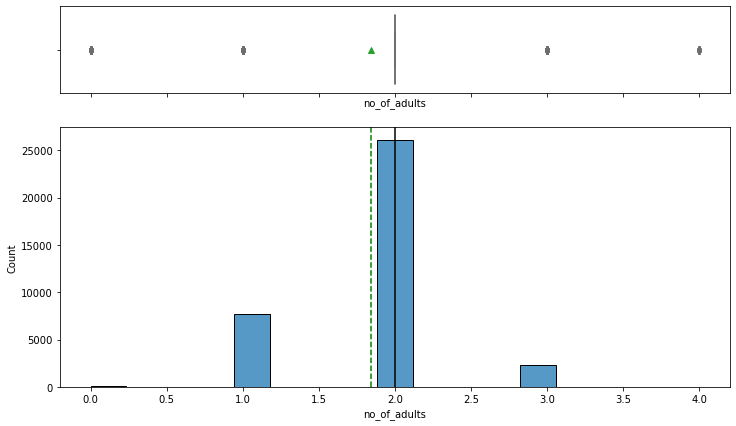

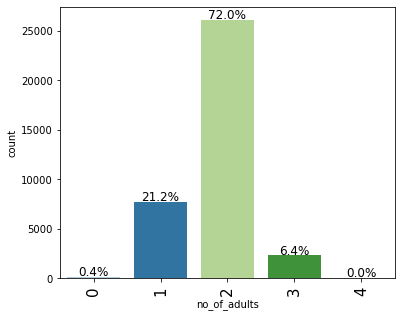

In [18]:
histogram_boxplot(inn , 'no_of_adults')
labeled_barplot(inn , 'no_of_adults',perc=True)

### Observation :
* Data also shows 0 adults
* 2 adults is usually the highest number upto 72%.

### no_of_children 

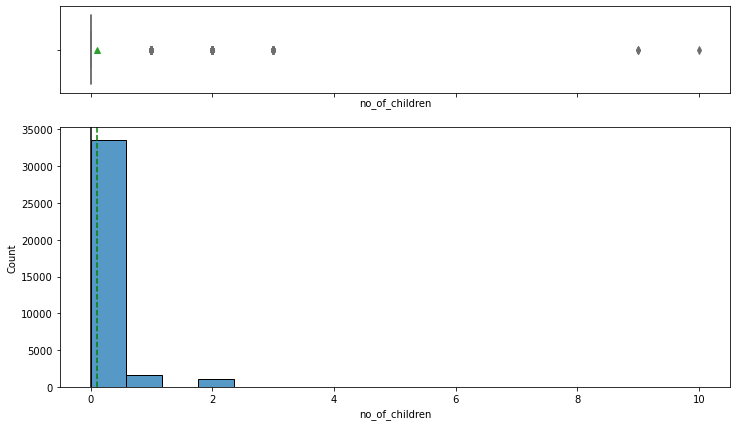

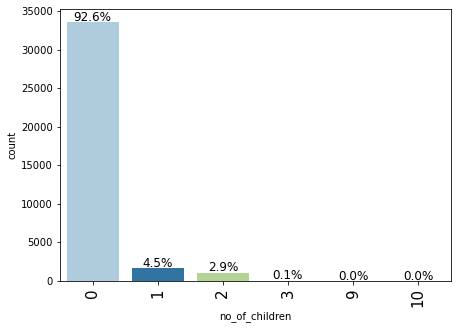

In [19]:
histogram_boxplot(inn , 'no_of_children')
labeled_barplot(inn , 'no_of_children',perc=True)

### Observation: 
* Bookings with no children shows the highest number by 93%.
* No of children columns has unique number 9 and 10 resulting in outliers. which is odd it could be one odd case or a typo error and needs to be treated.

### no_of_weekend_nights

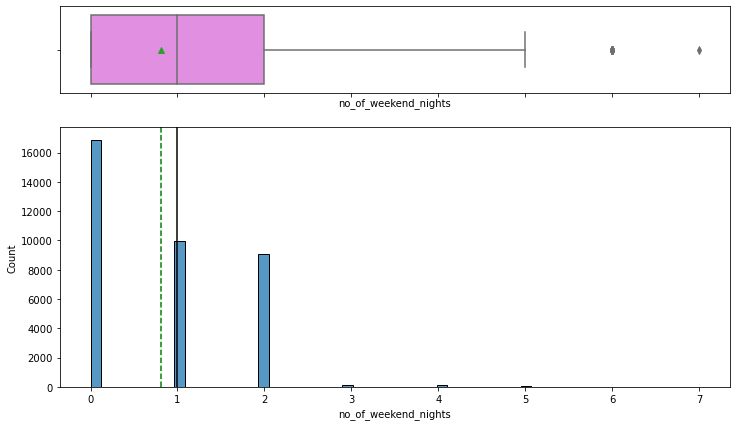

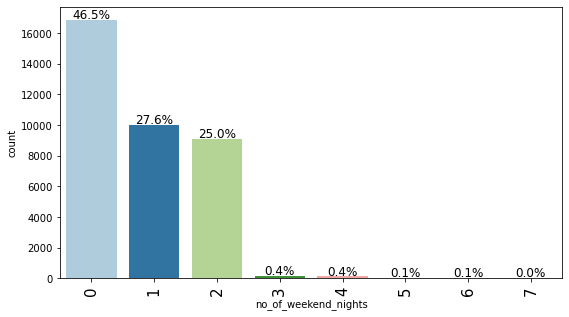

In [20]:
histogram_boxplot(inn , 'no_of_weekend_nights')
labeled_barplot(inn , 'no_of_weekend_nights',perc=True)

### Observation: 
*  No of weekend nights guests visited the hotel but did not stay is 46%.
* Most of the guests do not stay for the night

### no_of_week_nights

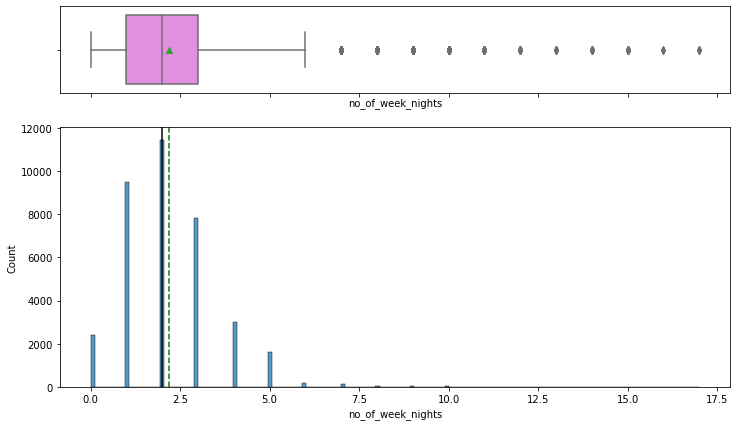

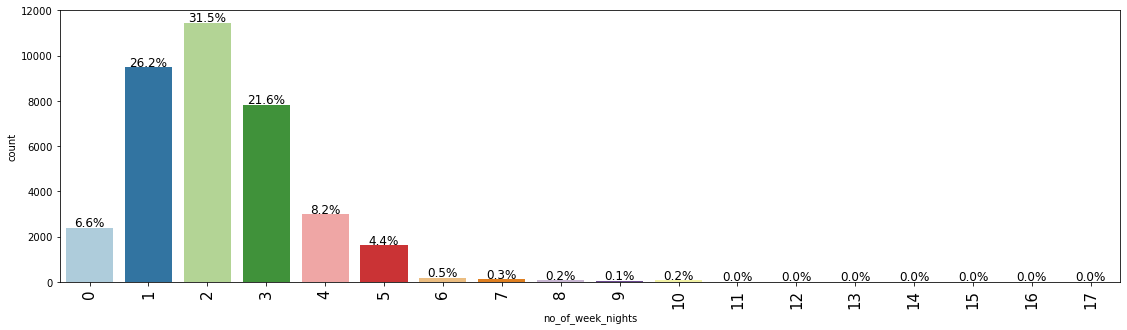

In [21]:
histogram_boxplot(inn , 'no_of_week_nights')
labeled_barplot(inn , 'no_of_week_nights',perc=True)

### Observation:

* 2 week nights is mostly preffered by the guests by 31.5%.

### required_car_parking_space

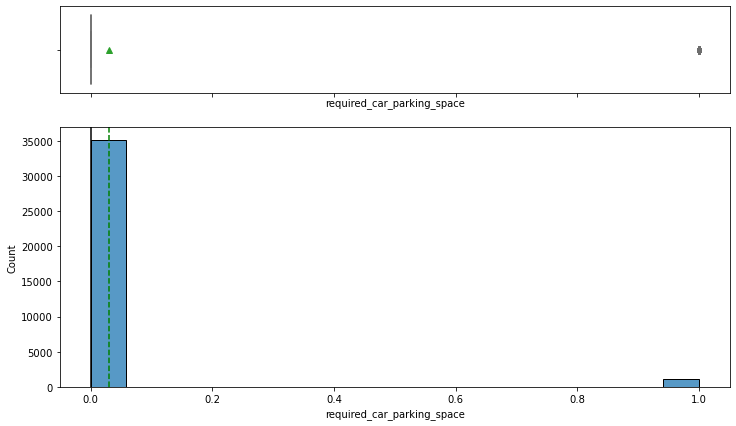

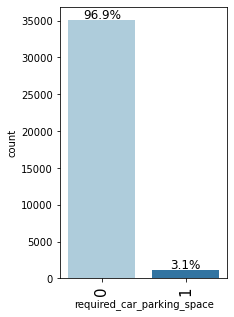

In [22]:
histogram_boxplot(inn , 'required_car_parking_space')
labeled_barplot(inn , 'required_car_parking_space', perc=True)

### Observation : 

* Not many guests usually  require parking space and shows a majority or percentage by 96.9%.
* Parking space needed by the guests is usually 3.1%.

### lead_time

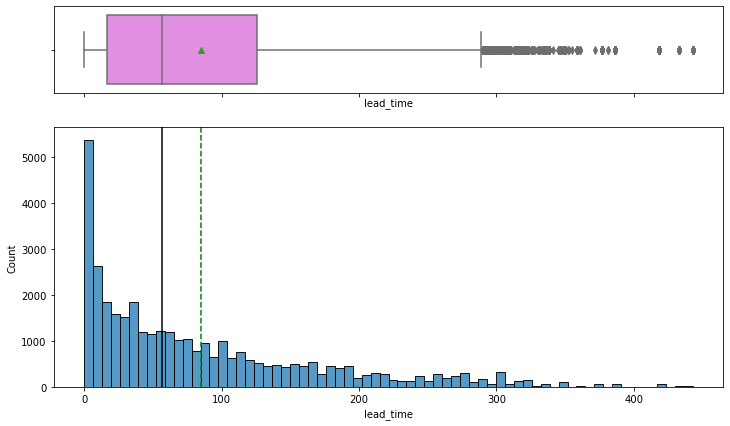

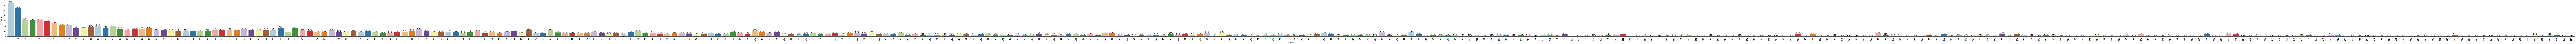

In [23]:
histogram_boxplot(inn , 'lead_time')
labeled_barplot(inn , 'lead_time', perc = True)

### Observation : 

* min lead time is 0 days 
* Max lead time is around 400 days and more which means guests book the hotel well in advance.
* Avg lead time is aroud 80 days 
* Possible outliers and needs to be treated 

### arrival_year

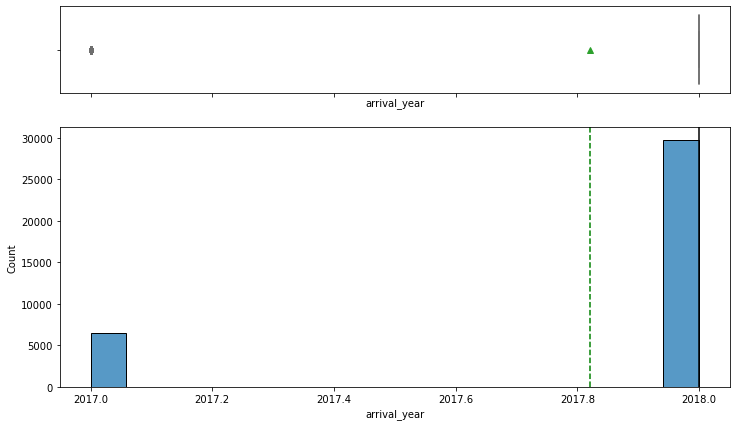

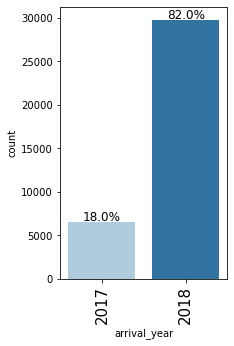

In [24]:
histogram_boxplot(inn , 'arrival_year')
labeled_barplot(inn , 'arrival_year',perc = True)

### Observation : 

* Theres only booking data for the year 2017 and 2018.
* Most of the bookings are for the year 2018.

### arrival_month

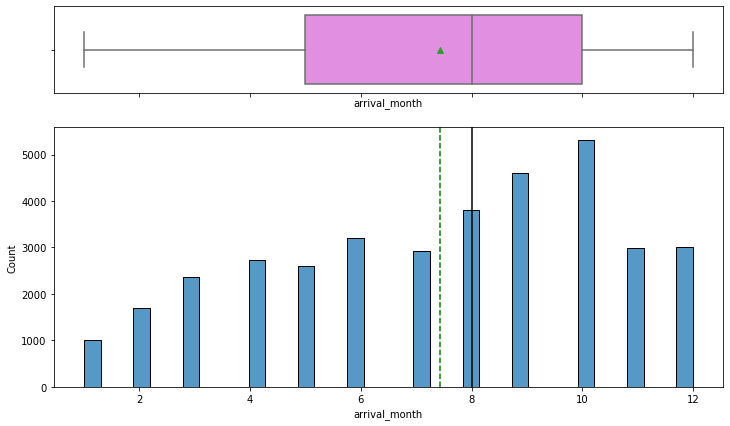

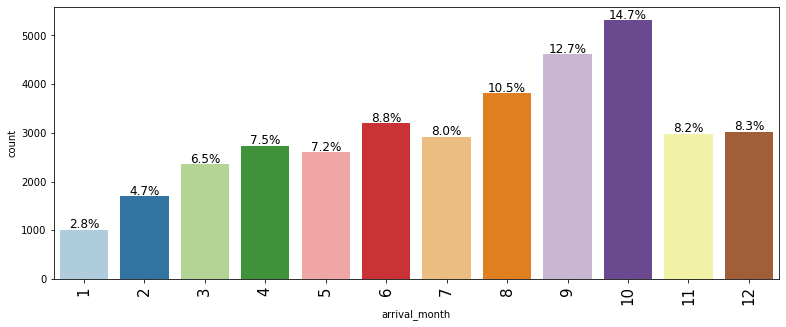

In [25]:
histogram_boxplot(inn , 'arrival_month')
labeled_barplot(inn , 'arrival_month', perc = True)

### Observation : 

* 10th month being the most preferred month which is october.
* 8th , 9th and 10th month preferrably have booking rate.
* 1st month i.e jan has the least bookings.
* 6th , 7th , 11th and 12th are also busy months
* However, theres booking through out the year.

### arrival_date

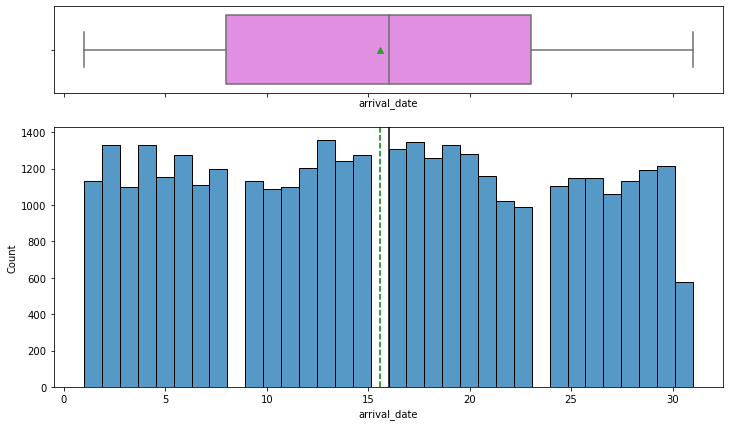

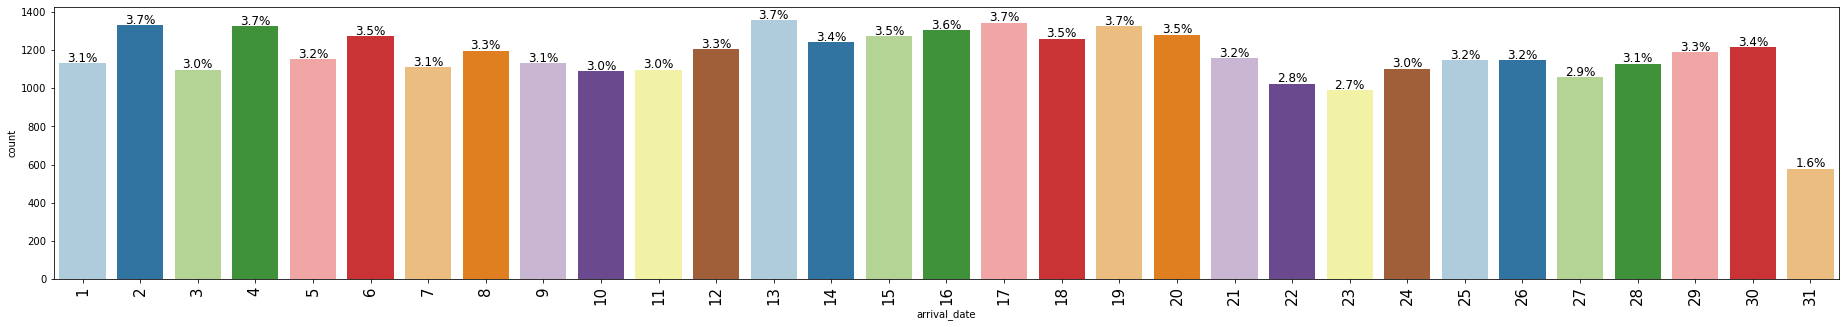

In [26]:
histogram_boxplot(inn , 'arrival_date')
labeled_barplot(inn , 'arrival_date', perc=True)

### Observation : 
* The data shows most of the dates are occupied. There is no particular pattern to the data and no outliers.
* However, 31st is the date which have least bookings.

### repeated_guest

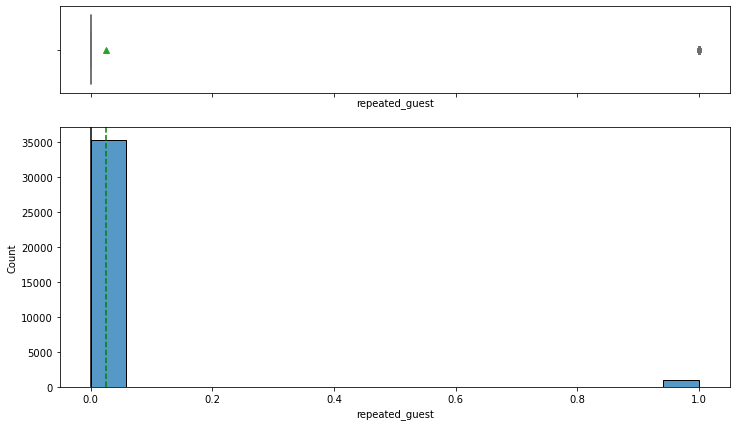

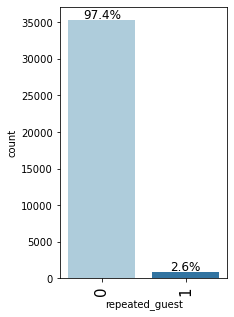

In [27]:
histogram_boxplot(inn , 'repeated_guest')
labeled_barplot(inn , 'repeated_guest', perc = True)

### Observation : 

* Repeated guests is basically  boolean values 0 and 1. ( 0 - No, 1- Yes)
* we do have repeated guests but not much. 
* However, most of the data shows one time guests.

### no_of_previous_cancellations

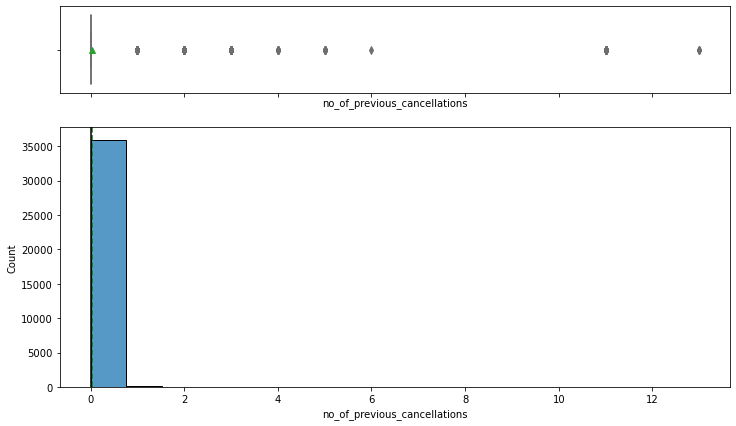

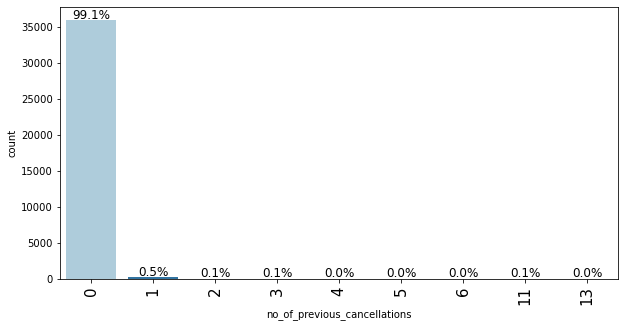

In [28]:
histogram_boxplot(inn , 'no_of_previous_cancellations')
labeled_barplot(inn , 'no_of_previous_cancellations', perc = True)

### Observations : 
* 99 %  which is majority of the bookings were  cancelled.
* However, there are cancellations post 10 days and can be outliers which needs to be treated 


### no_of_previous_bookings_not_canceled

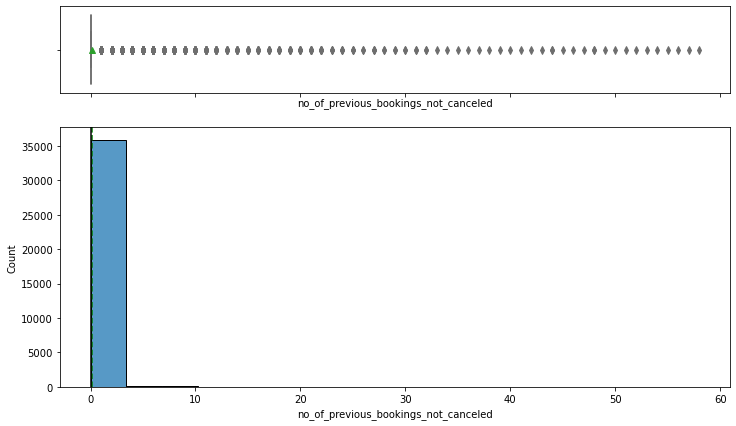

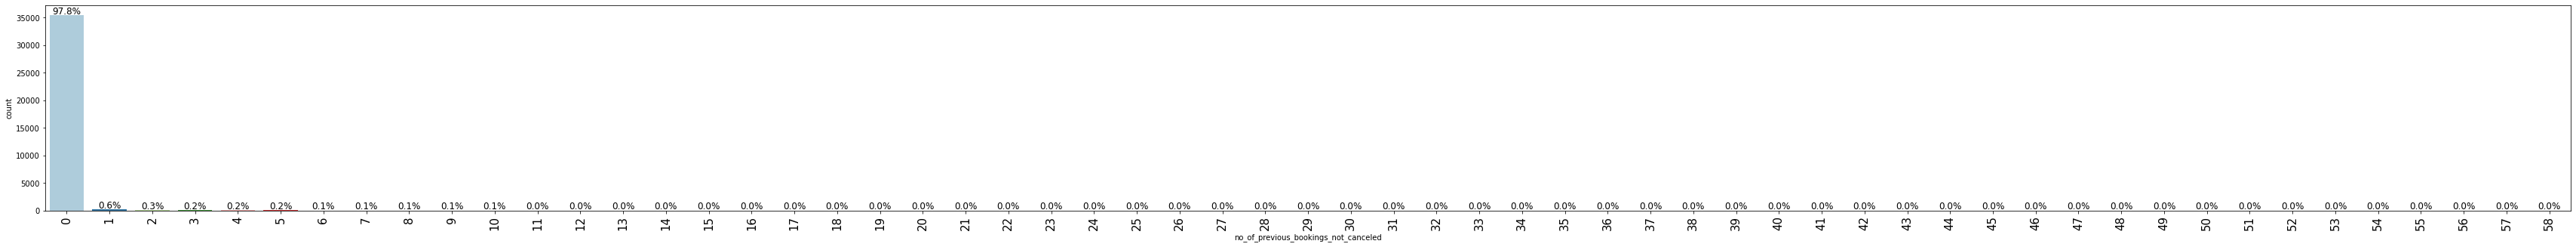

In [29]:
histogram_boxplot(inn , 'no_of_previous_bookings_not_canceled')
labeled_barplot(inn , 'no_of_previous_bookings_not_canceled', perc=True)

### Observations :
* 99 % which is majority of the bookings were not cancelled.

### avg_price_per_room

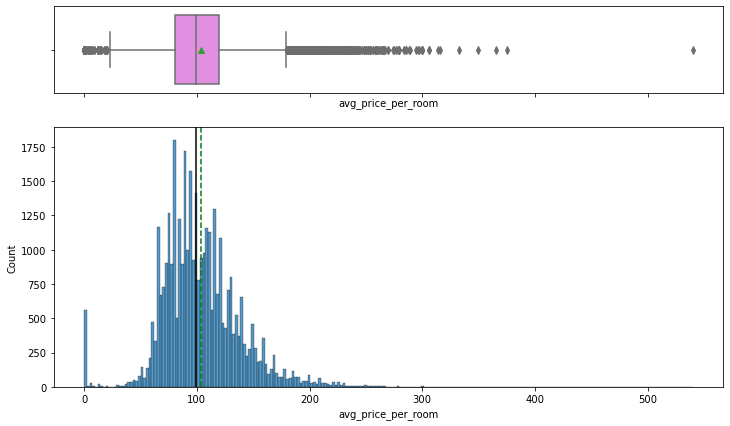

In [30]:
histogram_boxplot(inn , 'avg_price_per_room')

### Observation: 

* It has 0 price is which odd and could be an entry error or can be other reasons.
* Max price goes beyond 500 and is a possible outlier and needs to be treated.
* Avg price per room is around 100 Euros


### no_of_special_requests

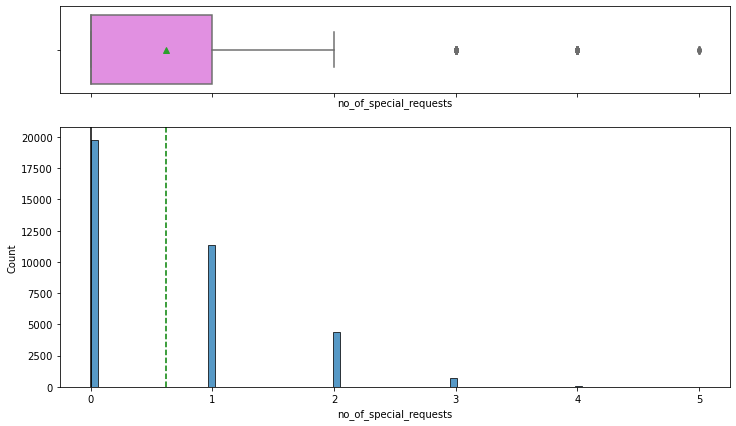

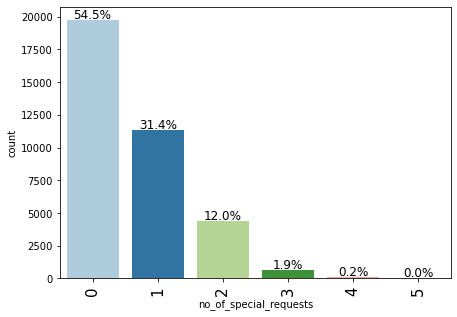

In [31]:
histogram_boxplot(inn , 'no_of_special_requests')
labeled_barplot(inn , 'no_of_special_requests', perc = True)

### Observation : 
* There are a total 6 unqiue special requests. 
* Most of the times there were no special request made by the customers

### type_of_meal_plan 

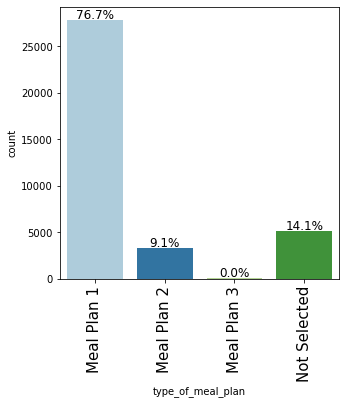

In [32]:
labeled_barplot(inn, 'type_of_meal_plan', perc=True)

### Observation: 

* Meal plan 1 is most preferred by the customers.

### room_type_reserved

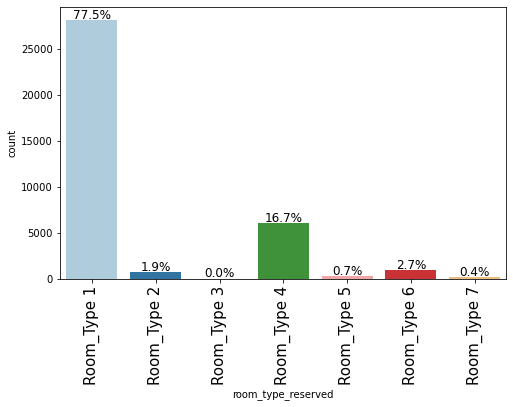

In [33]:
labeled_barplot(inn, 'room_type_reserved', perc=True, n=None)


### Observation:
* There are total of 7 room types 
* Room_type_1 is most preferred.

### market_segment_type

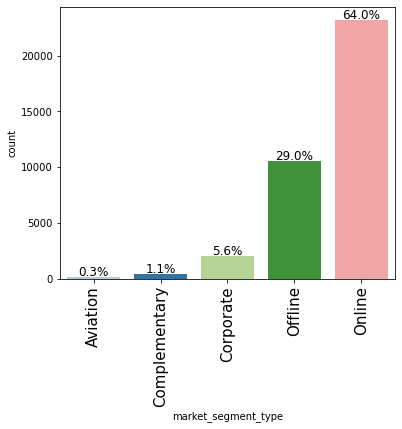

In [34]:
labeled_barplot(inn, 'market_segment_type', perc=True, n=None)


### Observation:
* There are 5 types of market segements where customers do the bookings.
* Customers mostly prefere online booking.

### booking_status

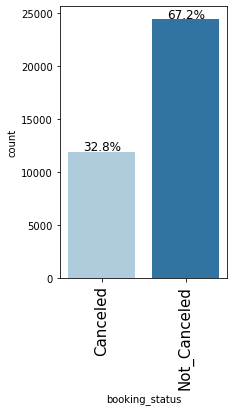

In [35]:

labeled_barplot(inn, 'booking_status', perc=True, n=None)


### Observation:

* 68% of the times bookings were not cancelled.
* 32% Of the times customers have cancelled their bookings.

### Bivariate Analysis against the target varible "booking_status" 

### Type of plots used 

####  * Stacked Bar plot
####  * Distribution plot

#### * Conducting bi variate analysis against the target varible with all the independent variables individually to understand how it effects the target variable indivdually.

### 'no_of_adults' vs  'booking_status'

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


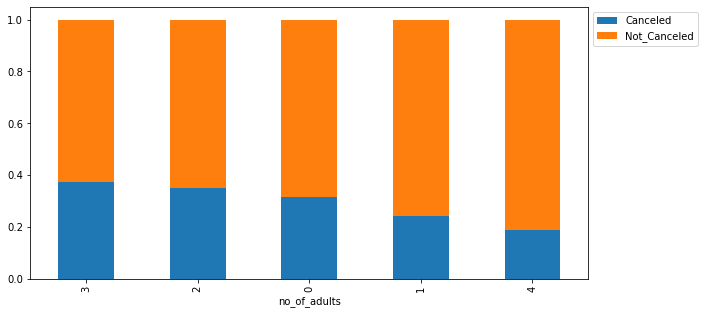

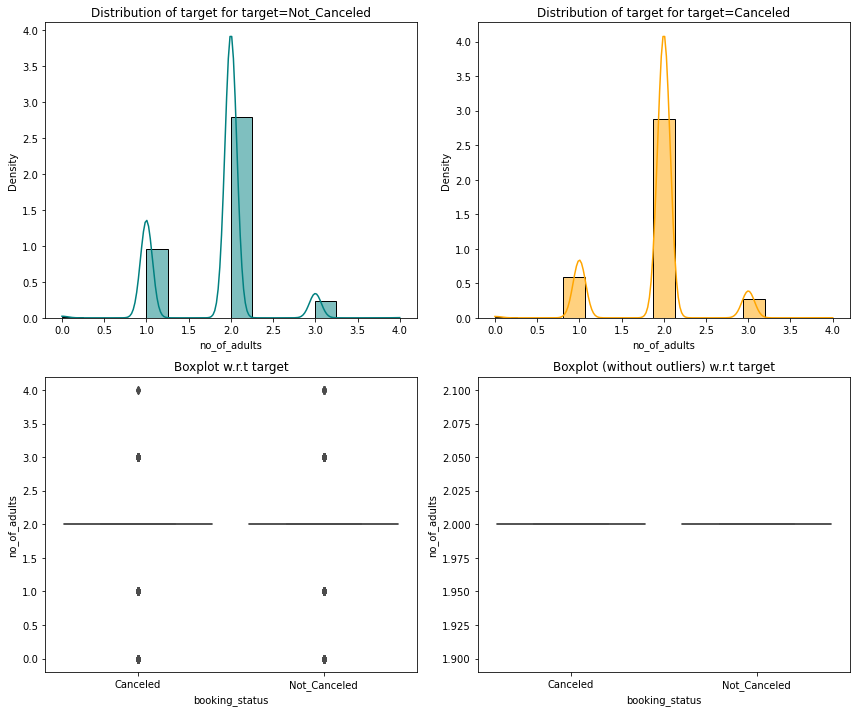

In [36]:
stacked_barplot(inn,'no_of_adults','booking_status')
distribution_plot_wrt_target(inn,'no_of_adults','booking_status')

### Observation : 

* As, shown above most of the bookings are done by 2 adults. 
* Also, most of the cancellations are contributed by the bookings done for 2 adults.
* However, most of the data is inclinced towards Not cancelled data.
* It is hard to determine or conclude if no of adults  have an effect on the cancellations.


### 'no_of_children' vs 'booking_status'

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


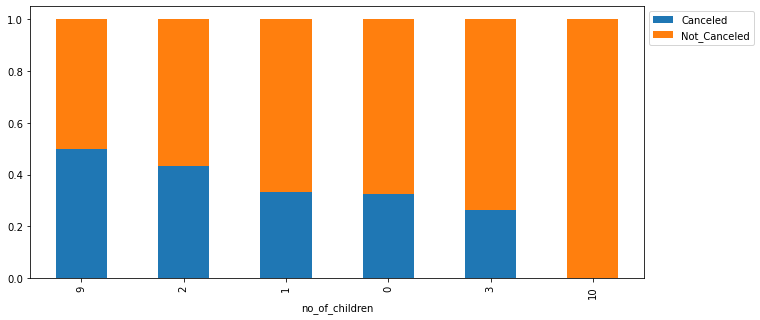

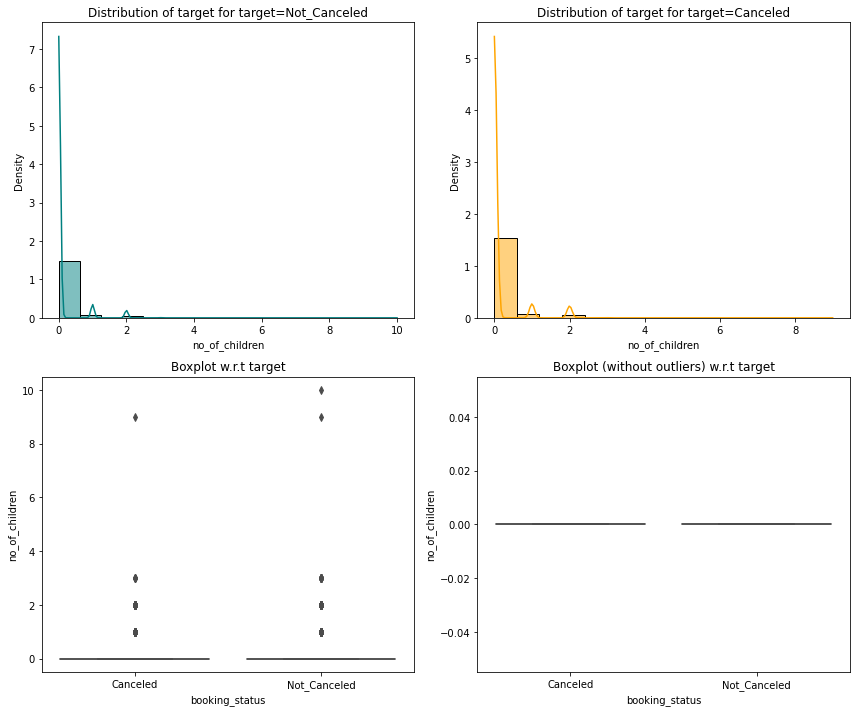

In [37]:
stacked_barplot(inn,'no_of_children','booking_status')
distribution_plot_wrt_target(inn, 'no_of_children','booking_status',)

### Observation: 

* Most of the bookings have 0 children.
* However, most of the data comes is inclinced towards Not cancelled data.
* we cannot determine or conclude if no of children have an effect on the cancellations.


### 'no_of_weekend_nights' vs 'booking_status'

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      11885         24390  36275
0                         5093         11779  16872
1                         3432          6563   9995
2                         3157          5914   9071
4                           83            46    129
3                           74            79    153
5                           29             5     34
6                           16             4     20
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


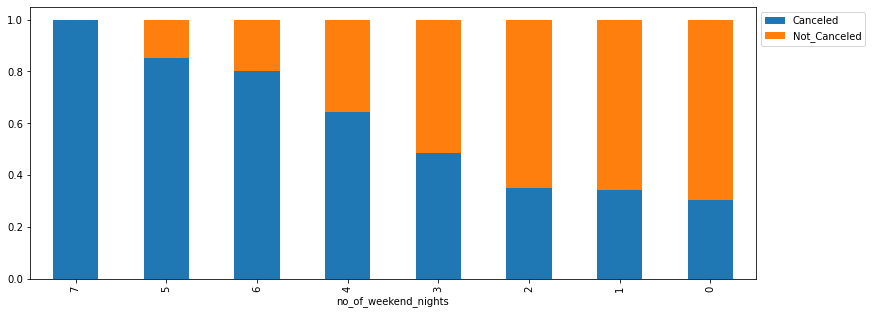

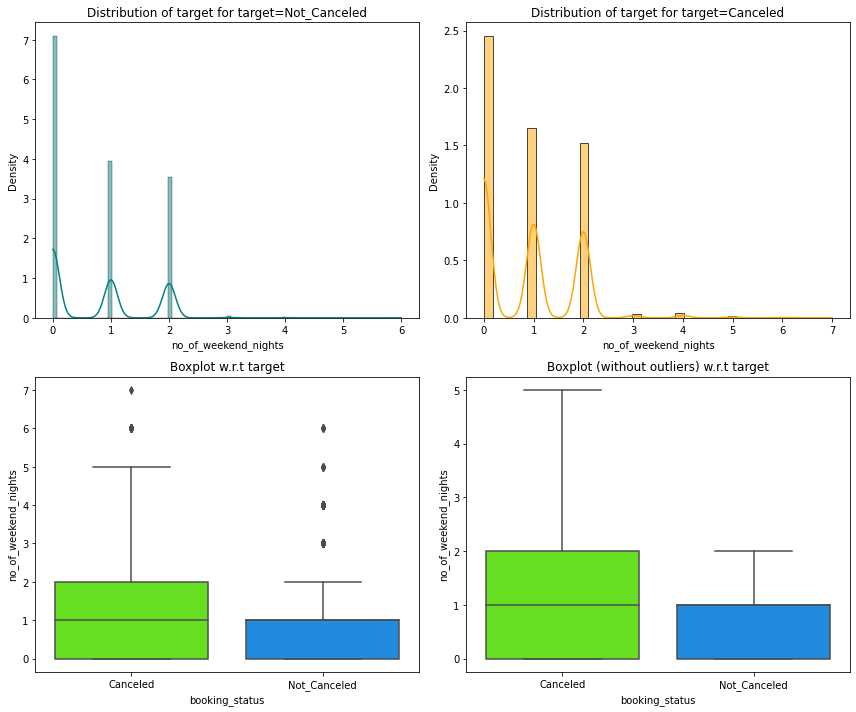

In [38]:
stacked_barplot(inn,'no_of_weekend_nights','booking_status')
distribution_plot_wrt_target(inn, 'no_of_weekend_nights', 'booking_status')

### Observation : 
* most of the data shows 0 weekend nights.
* However, bookings greater than 4 days show a very high  rate of cancellations.
* Higher the weekend night higher the cancellations.
* It has some effect on booking cancellations. 

### 'no_of_week_nights' vs 'booking_status'

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                   11885         24390  36275
2                      3997          7447  11444
3                      2574          5265   7839
1                      2572          6916   9488
4                      1143          1847   2990
0                       679          1708   2387
5                       632           982   1614
6                        88           101    189
10                       53             9     62
7                        52            61    113
8                        32            30     62
9                        21            13     34
11                       14             3     17
15                        8             2     10
12                        7             2      9
13                        5             0      5
14                        4             3      7
16                        2             0      2
17                  

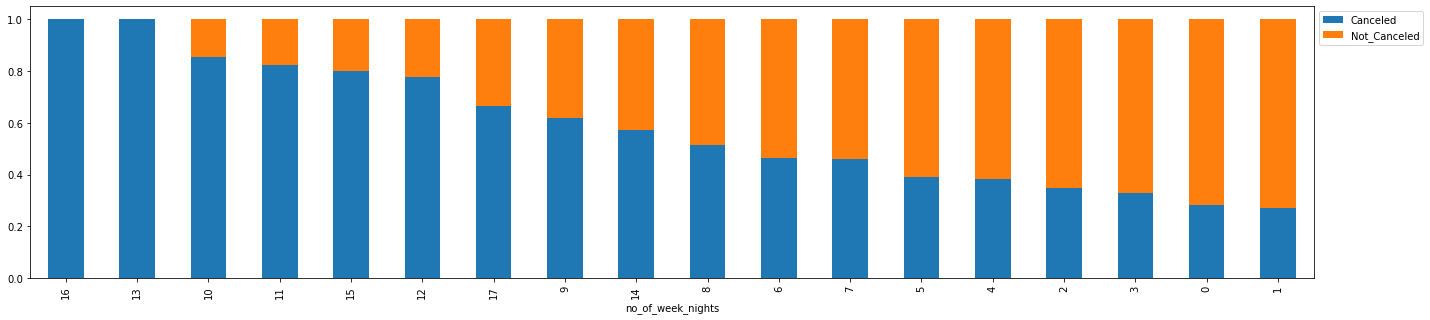

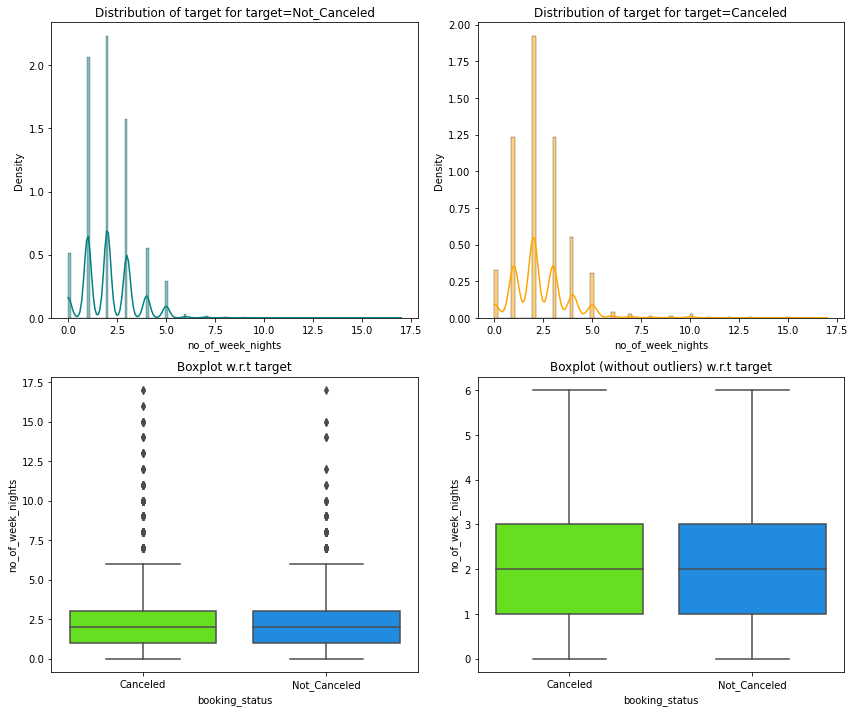

In [39]:
stacked_barplot(inn, 'no_of_week_nights', 'booking_status')
distribution_plot_wrt_target(inn, 'no_of_week_nights', 'booking_status')

### Observation: 
* Most of the data is around 2 week nights.
* However, higher the week nights booked higher chances of cancellation is observed.
* Has some effect on booking status.

### 'type_of_meal_plan' vs 'booking_status'

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


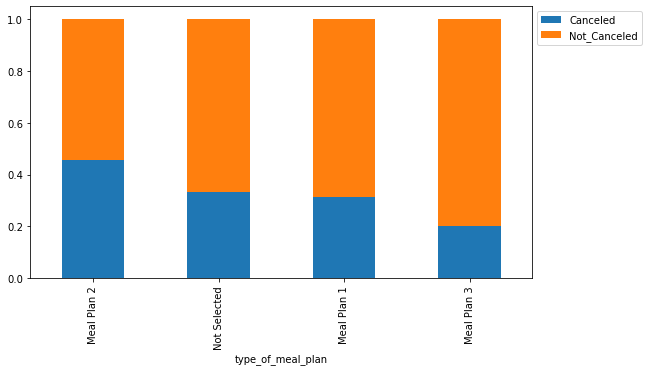

In [40]:
stacked_barplot(inn, 'type_of_meal_plan', 'booking_status')

### Observation : 
* Most of the preferred type of meal is meal plan 1.
* customers who meal plan 2 show higher rate of cancellation.
* However, it is not appropriate to say or conclude if meal plan has any direct effect on booking cancellations. Because, meal plan is something that is selected before or after and for sure can be altered in later stages.

###  'required_car_parking_space' vs 'booking_status'

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


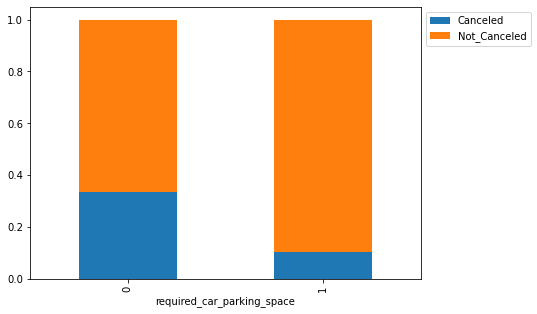

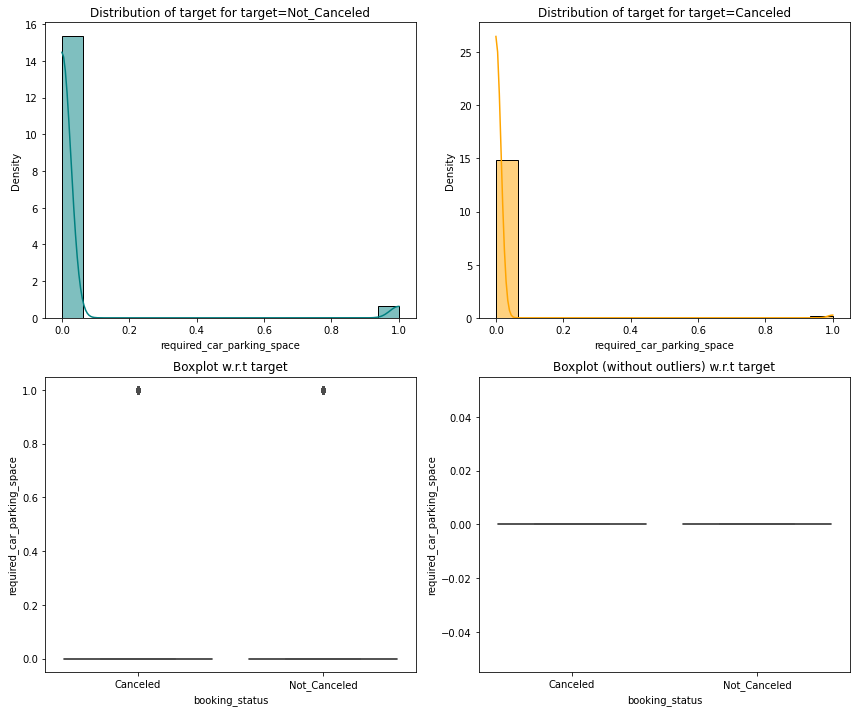

In [41]:
stacked_barplot(inn, 'required_car_parking_space', 'booking_status')
distribution_plot_wrt_target(inn, 'required_car_parking_space', 'booking_status')

### Observation : 
* As, shown above most of the booking dint need parking space.
* Also, the cancellations on customers who booked the hotel needed parking space is very less.
* However, the customers who needed parking space show very less cancellations.
* It isnt appropriate to conclude if parking space has direct effect on booking cancellations.

### 'room_type_reserved' vs 'booking_status'

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


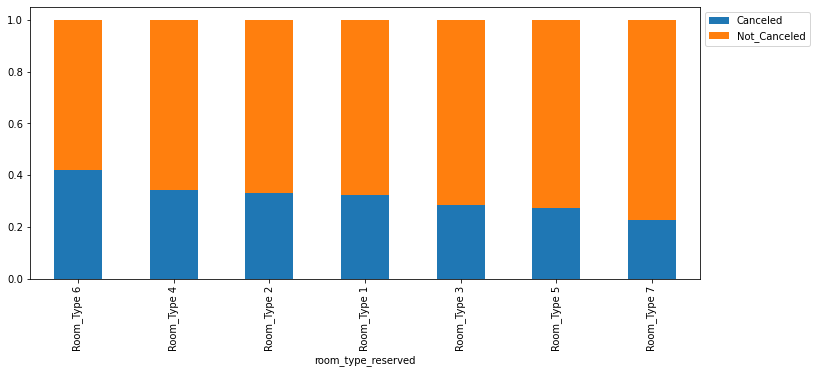

In [42]:
stacked_barplot(inn, 'room_type_reserved', 'booking_status')

### Observation : 

*	7 types of reserved rooms
*	Room 1 is highly preferred and where most of the data comes from. supposedly one of the basic economic rooms where most of the customers can afford.
* Usually customers opt for different type of rooms as per their comforts and requirements.
* If a certain facitlity or type of requirements are not provided chances are they might cancel the booking if they find options.
* Room type might have some effect on booking cancellations.

### 'lead_time' vs 'booking_status'

booking_status  Canceled  Not_Canceled    All
lead_time                                    
All                11885         24390  36275
188                  142            11    153
166                  122            19    141
245                  111             3    114
1                    110           968   1078
...                  ...           ...    ...
306                    0             2      2
336                    0            15     15
327                    0            15     15
318                    0             1      1
300                    0             1      1

[353 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


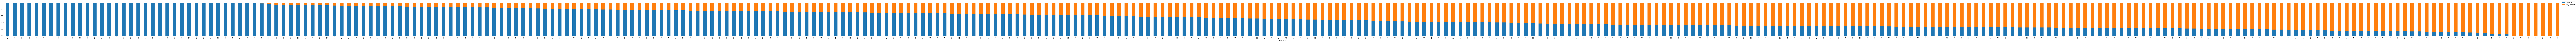

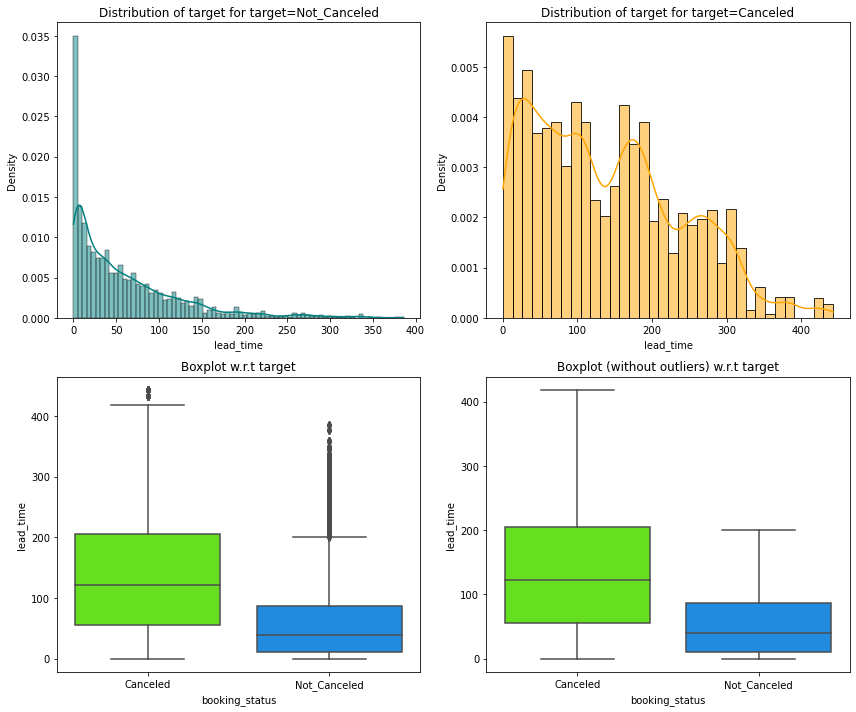

In [43]:
stacked_barplot(inn,'lead_time', 'booking_status')
distribution_plot_wrt_target(inn, 'lead_time', 'booking_status')

### Observation: 
* min lead time is 0 days  max lead time is 443 days which is clearly an outlier.  
* As it clearly seen in the  plot the higher the lead time the higher are the chances of booking cancellations.
* lead Time definitely has high impact on the booking cancellation.

### 'arrival_year'vs 'booking_status'

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


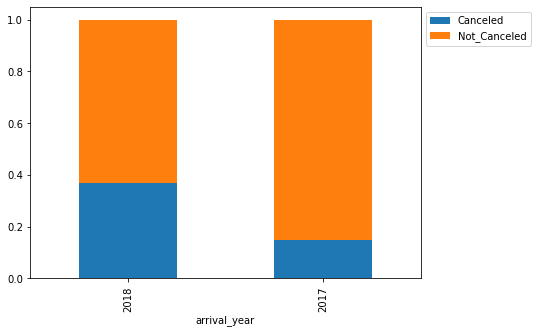

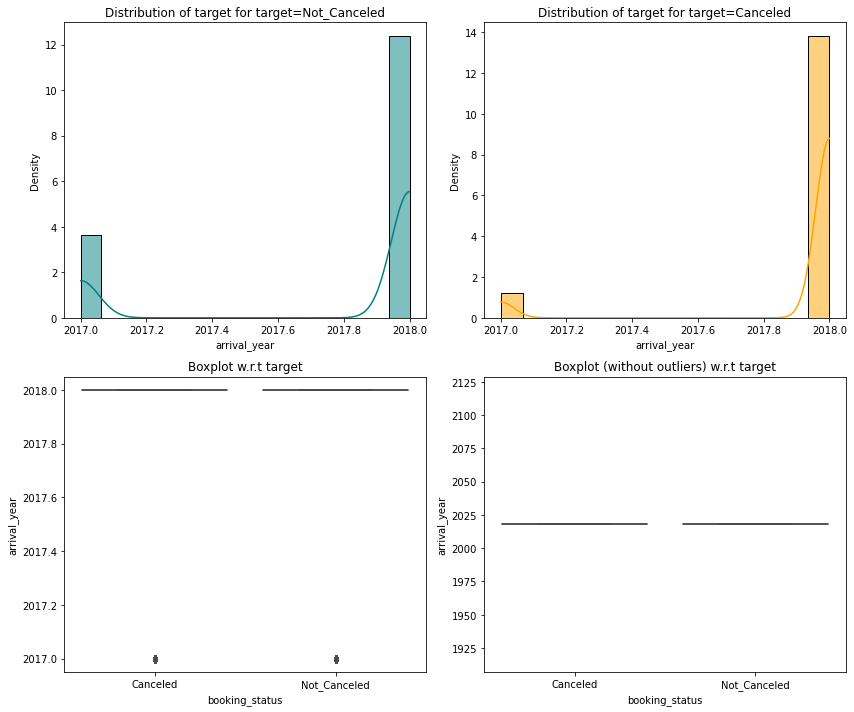

In [44]:
stacked_barplot(inn,'arrival_year', 'booking_status', )
distribution_plot_wrt_target(inn, 'arrival_year', 'booking_status')

### Observation:
* Most of the booking are seen for the year 2018.
* Also ,the booking cancellations for the year 2018 is high.
* May be one of the factors such as lead time has an effect of the arrival year. Customers usually book in advance if they get a good deal or  better prices if booked in advance . 
* But when its time of the year they usually end up cancelling because of various personal or professional reasons.
* Arrival year has some effect on the booking status.

### 'arrival_month' vs 'booking_status'

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


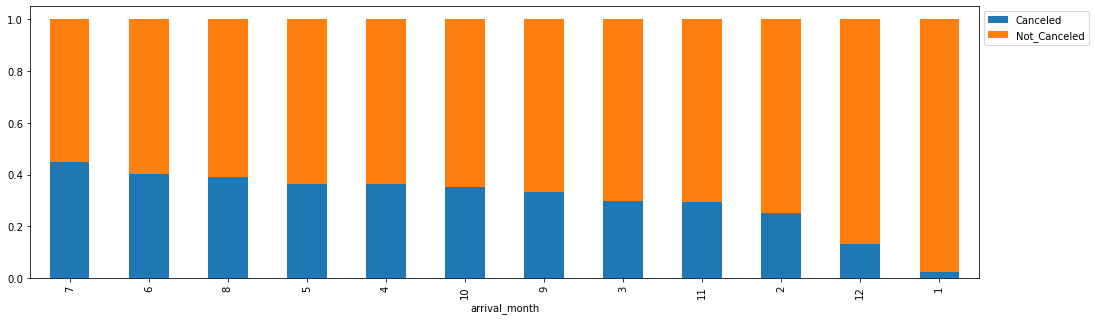

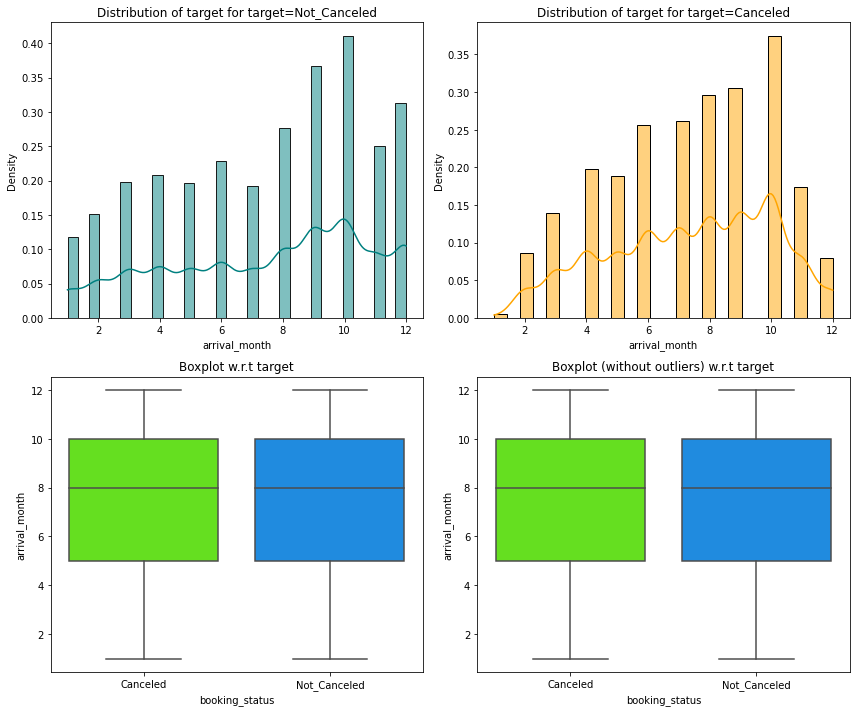

In [45]:
stacked_barplot(inn,'arrival_month', 'booking_status', )
distribution_plot_wrt_target(inn, 'arrival_month', 'booking_status')

### Observation:
* As , we have seen above month 10 has most of the bookings. 
* 7th month followed by 6 th month has higher booking cancellations when compared to the others months.
* 7th month which is july and july being a hot season in Portugal. customers may be  do not opt portugal for summer weathers.
* Also, factors like lead time also will have an effect on arrival month.
* There can be many reasons.How ever we can say month has also some effect on booking cancellations.

### 'arrival_date', 'booking_status'

booking_status  Canceled  Not_Canceled    All
arrival_date                                 
All                11885         24390  36275
15                   538           735   1273
4                    474           853   1327
16                   473           833   1306
30                   465           751   1216
1                    465           668   1133
12                   460           744   1204
17                   448           897   1345
6                    444           829   1273
26                   425           721   1146
19                   413           914   1327
20                   413           868   1281
13                   408           950   1358
28                   405           724   1129
3                    403           695   1098
25                   395           751   1146
21                   376           782   1158
24                   372           731   1103
18                   366           894   1260
7                    364          

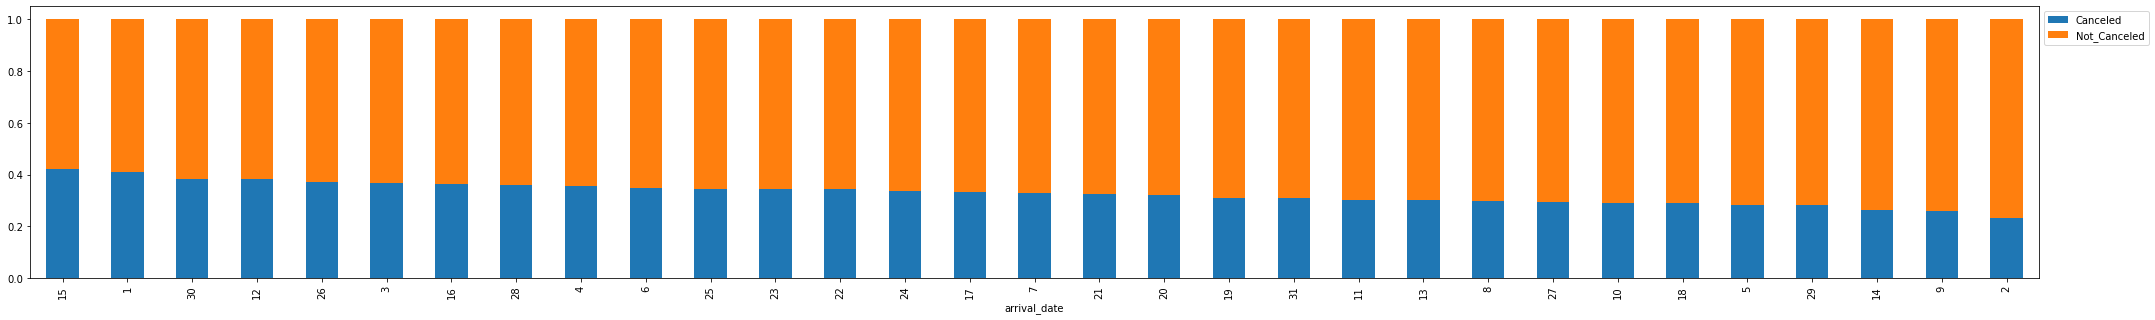

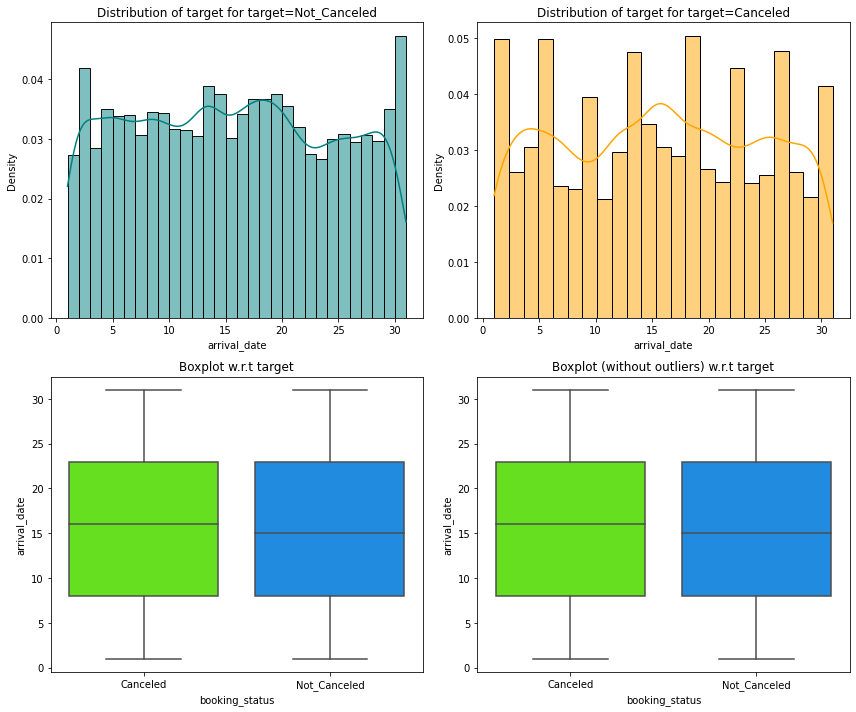

In [46]:
stacked_barplot(inn,'arrival_date', 'booking_status', )
distribution_plot_wrt_target(inn, 'arrival_date', 'booking_status')

### Observation:
* It is hard to conclude anything with the arrival date. As, the data is evenly spread.
* As data , associated with month and year of booking it might have some effect on booking cancellations.

###  'market_segment_type' vs 'booking_status'

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


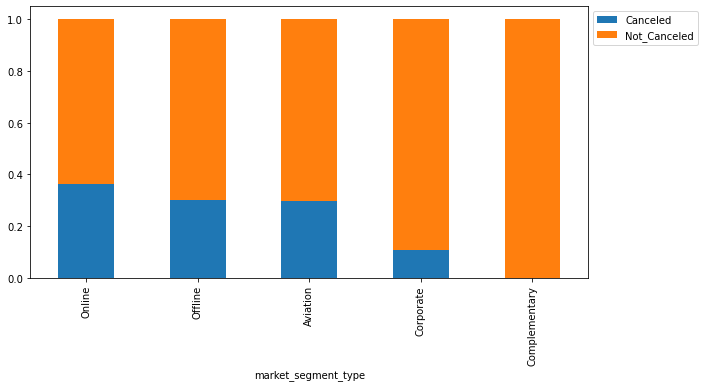

In [47]:
stacked_barplot(inn,'market_segment_type', 'booking_status', )

### 0bservation:

* There a 5 different market segments where the bookings are done.
* Online segment has the highest bookings also not to forget it has also contributed to highest booking cancellations followed by other segments.
* However, we can conclude that market segement definitely has an effect on Booking cancellations.

### 'repeated_guest' vs  'booking_status'

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


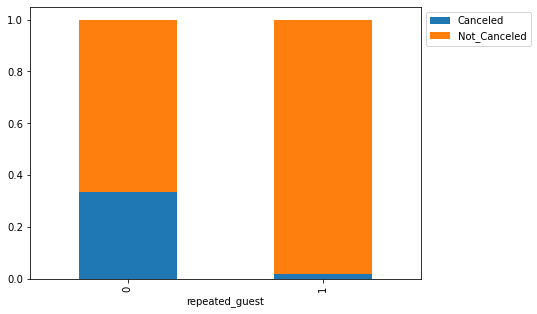

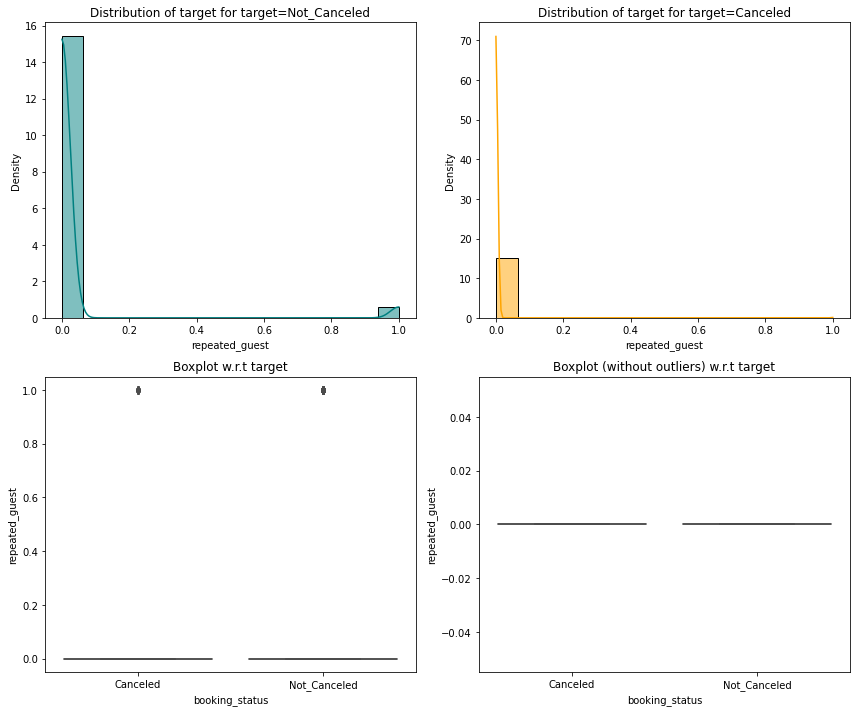

In [48]:
stacked_barplot(inn,'repeated_guest', 'booking_status', )
distribution_plot_wrt_target(inn, 'repeated_guest', 'booking_status')

### Observation: 

* There is a very less percentage of repeated guests. However,the cancellations from the repeated guests is very low.
* One time bookings who do not book again or non repeated guest contribute to high booking cancellations.
* Repeated guests definitely has an effect on booking cancellations.

### 'no_of_previous_cancellations' vs 'booking_status'

booking_status                Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              11885         24390  36275
0                                11869         24068  35937
1                                   11           187    198
13                                   4             0      4
3                                    1            42     43
2                                    0            46     46
4                                    0            10     10
5                                    0            11     11
6                                    0             1      1
11                                   0            25     25
------------------------------------------------------------------------------------------------------------------------


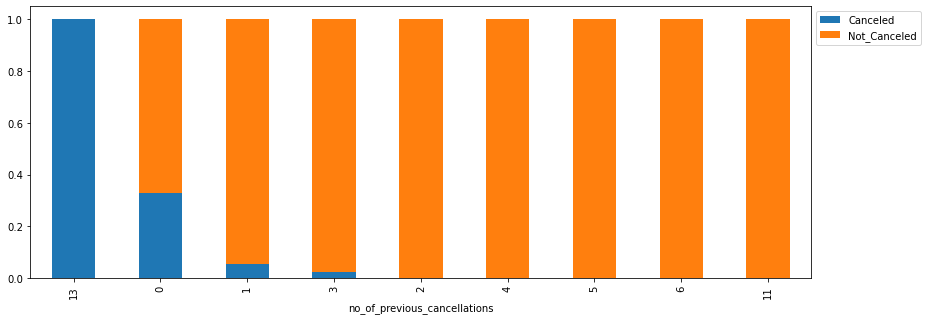

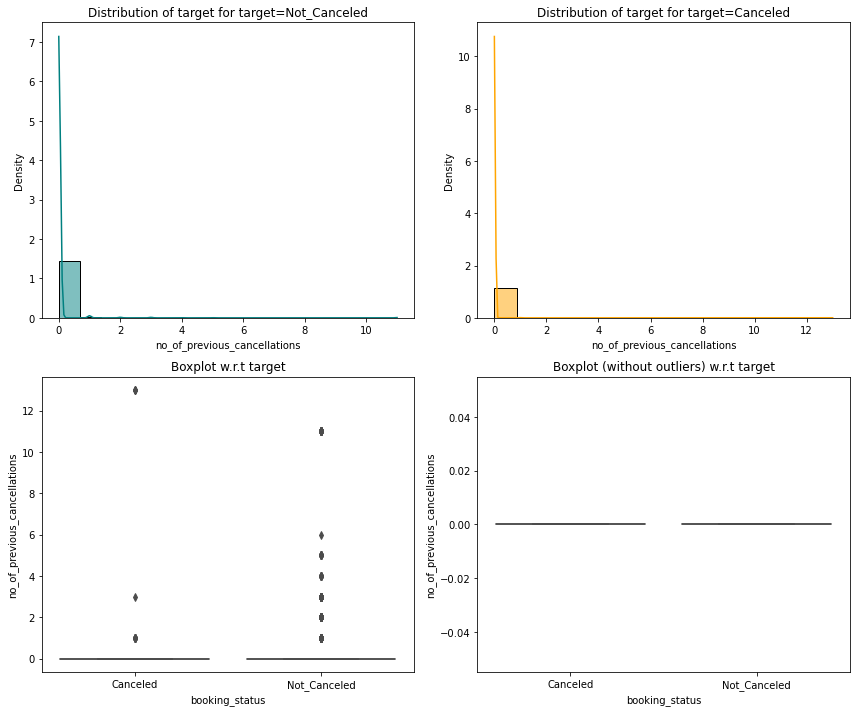

In [49]:
stacked_barplot(inn,'no_of_previous_cancellations', 'booking_status', )
distribution_plot_wrt_target(inn, 'no_of_previous_cancellations', 'booking_status')

### Observation:

* Observation 13 is an outlier and needs to treated.
* Also , the customers with  previous cancellations has chances of booking again.
* We can conclude no of previous cancellations has some effect on booking status.

booking_status                        Canceled  Not_Canceled    All
no_of_previous_bookings_not_canceled                               
All                                      11885         24390  36275
0                                        11878         23585  35463
1                                            4           224    228
12                                           1            11     12
4                                            1            64     65
6                                            1            35     36
2                                            0           112    112
44                                           0             2      2
43                                           0             1      1
42                                           0             1      1
41                                           0             1      1
40                                           0             1      1
38                                           0  

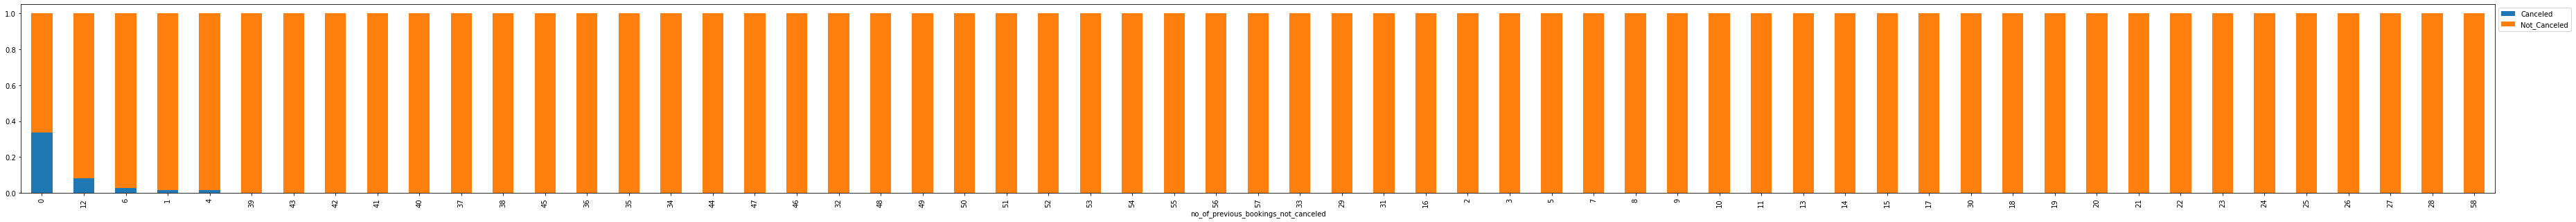

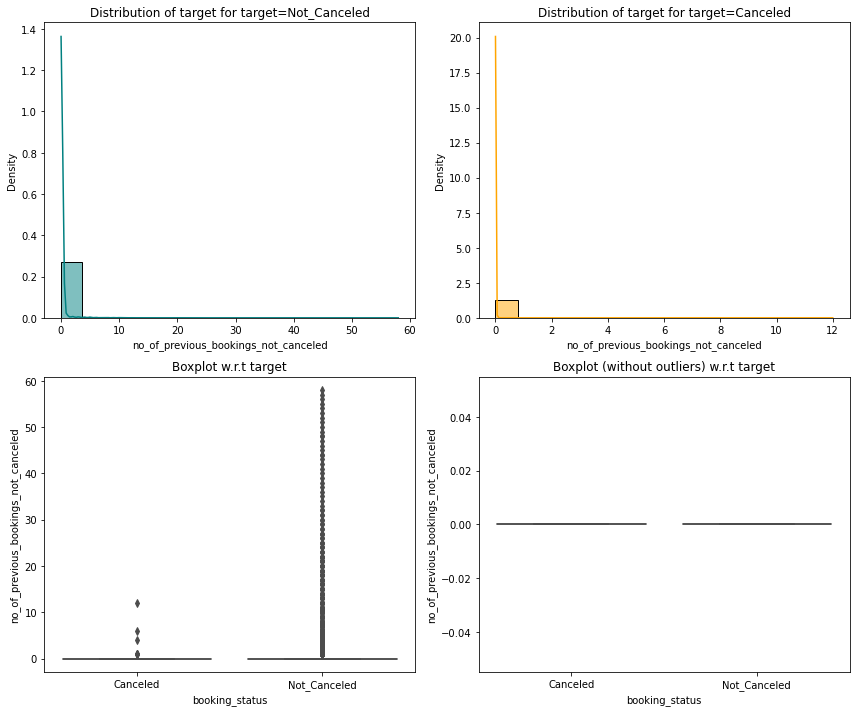

In [51]:
stacked_barplot(inn,'no_of_previous_bookings_not_canceled', 'booking_status', )
distribution_plot_wrt_target(inn, 'no_of_previous_bookings_not_canceled', 'booking_status')

### Observation:
* Any customer who has previously booked and not cancelled will surely not cancel in the future bookings.
* It surely has an effect on the booking status.

### 'no_of_special_requests' vs  'booking_status'

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


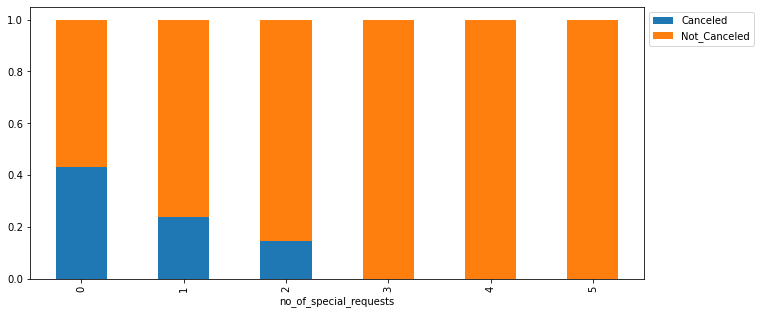

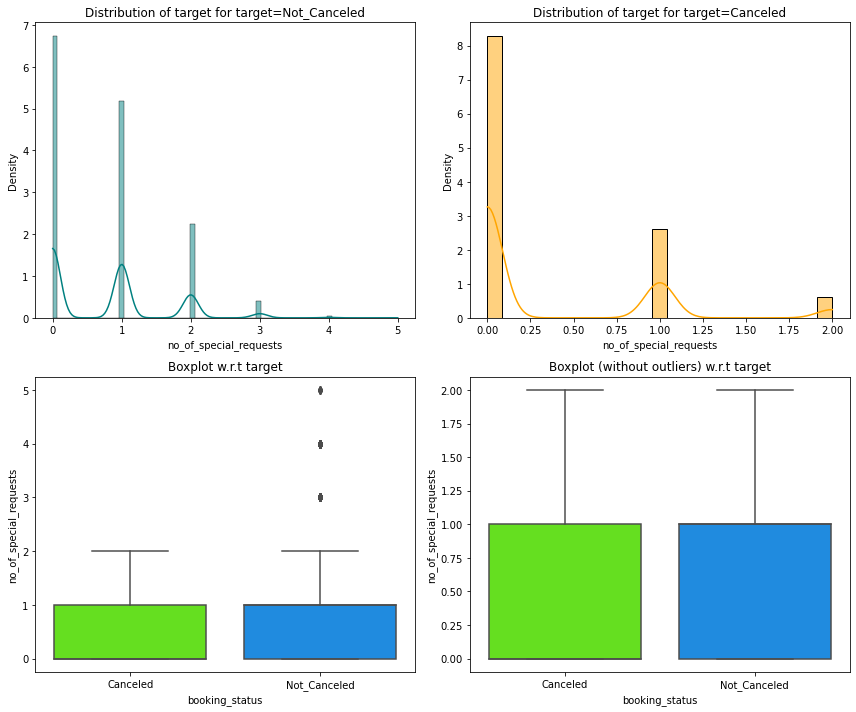

In [53]:
stacked_barplot(inn,'no_of_special_requests', 'booking_status',)
distribution_plot_wrt_target(inn, 'no_of_special_requests', 'booking_status')

### Observation : 
* customers provided with high number of special requirements has zero cancellations.
* customers with no special requirements have high number of cancellations.
* After all who wouldn’t like to be treated special.
* Hotel should be able to provide some kind of cost-effective special requirements to avoid cancellations
* Special requirements have some effect on booking status.


### 'avg_price_per_room' vs  'booking_status'

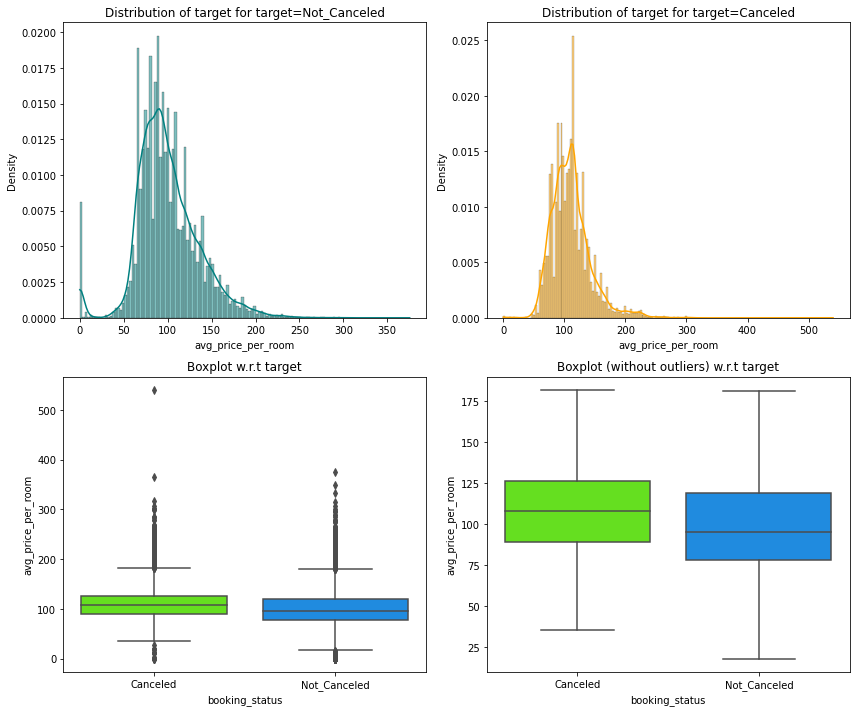

In [54]:
distribution_plot_wrt_target(inn, 'avg_price_per_room', 'booking_status')

### Observation:
* Min room price is 35 Euros and max room price is 540.
* Avg price per room is 103.42 Euros
* Definitely has outliers and needs to be treated,
* Price is defintely a factor which can effect booking status. 
* Higher the price the customers would cancel their booking if they find a better offer.
* Not much evidence to prove its effect on booking status.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Question 1: What are the busiest months in the hotel?

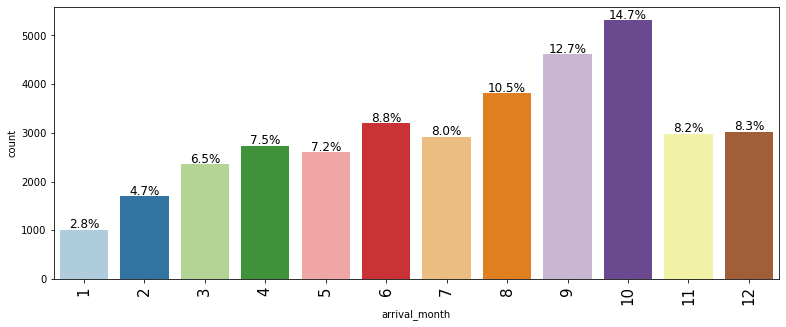

In [55]:
labeled_barplot(inn, 'arrival_month', perc=True)


### Observation:  

10th month which is October is the busiest month.

### Question 2: Which market segment do most of the guests come from?

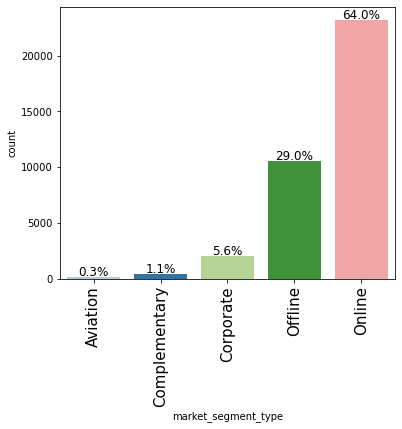

In [56]:
labeled_barplot ( inn,'market_segment_type', perc=True)

In [57]:
market = inn['market_segment_type']
market.value_counts(normalize=True).reset_index()

index  market_segment_type
0         Online              0.63994
1        Offline              0.29023
2      Corporate              0.05560
3  Complementary              0.01078
4       Aviation              0.00345

### Observation :
most of the guests are from the online market segment by 64% 

### Question 3: Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

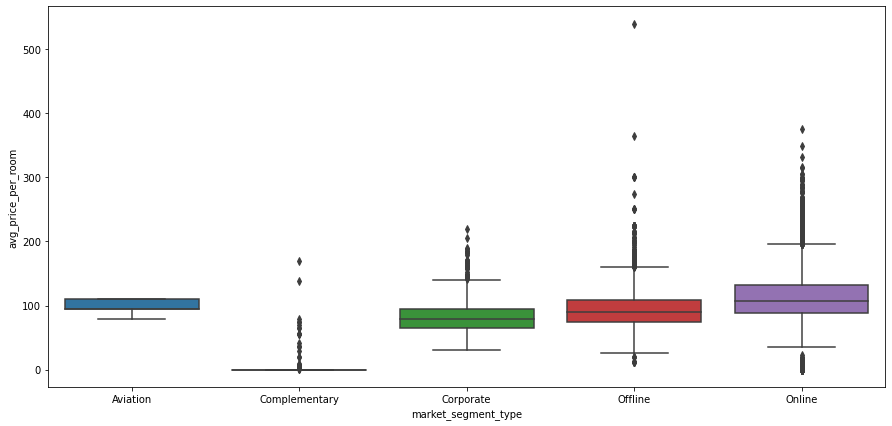

In [58]:
plt.figure(figsize=(15,7)) 
sns.boxplot(inn['market_segment_type'],inn['avg_price_per_room'])
plt.show()

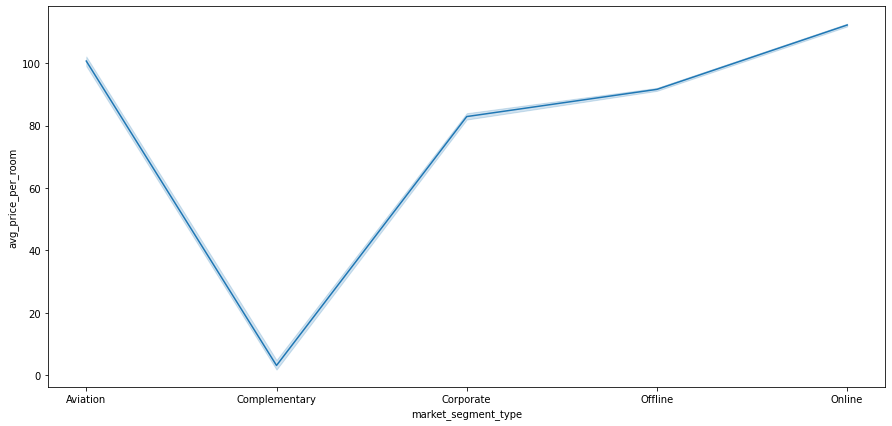

In [59]:
plt.figure(figsize=(15,7)) 
sns.lineplot(inn['market_segment_type'],inn['avg_price_per_room'])
plt.show()

### Observation:
* Online market segment prices are high comparison to other segments.
* complementary market segment prices are low.

### Question 4: What percentage of bookings are canceled?

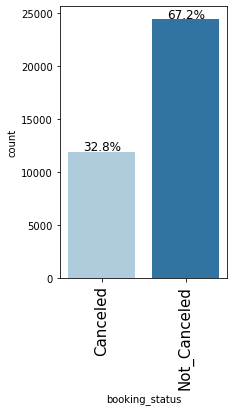

In [60]:
labeled_barplot ( inn,'booking_status', perc=True)

In [61]:
cancellations = inn['booking_status']
cancellations.value_counts(normalize=True).reset_index()

index  booking_status
0  Not_Canceled         0.67236
1      Canceled         0.32764

### Observation :

32 percentage of bookings are canceled

### Question 5: Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [62]:
inn.groupby('booking_status')['repeated_guest'].value_counts(normalize=True)

booking_status  repeated_guest
Canceled        0                0.99865
                1                0.00135
Not_Canceled    0                0.96253
                1                0.03747
Name: repeated_guest, dtype: float64

repeated_guest      0    1    All
booking_status                   
All             35345  930  36275
Not_Canceled    23476  914  24390
Canceled        11869   16  11885
------------------------------------------------------------------------------------------------------------------------


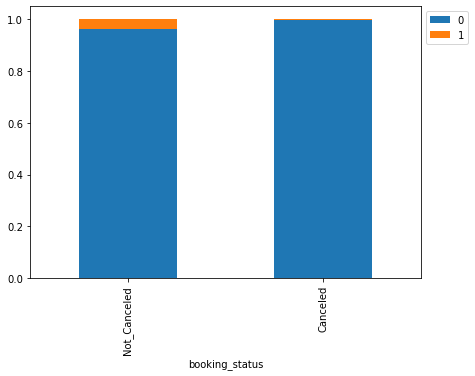

In [63]:
stacked_barplot(inn,'booking_status','repeated_guest' )

### Observation: 

* The percentage of cancellation for the repeated guest shows 1.3%.
* The percentage of cancellation is very low by the repeated guests.
* Brand Equity definitely plays an important role for the repeated guests.

### Question 6: Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [64]:
inn.groupby("booking_status")["no_of_special_requests"].value_counts(normalize=True)

booking_status  no_of_special_requests
Canceled        0                        0.71897
                1                        0.22743
                2                        0.05360
Not_Canceled    0                        0.46052
                1                        0.35547
                2                        0.15281
                3                        0.02768
                4                        0.00320
                5                        0.00033
Name: no_of_special_requests, dtype: float64

no_of_special_requests      0      1     2    3   4  5    All
booking_status                                               
Not_Canceled            11232   8670  3727  675  78  8  24390
All                     19777  11373  4364  675  78  8  36275
Canceled                 8545   2703   637    0   0  0  11885
------------------------------------------------------------------------------------------------------------------------


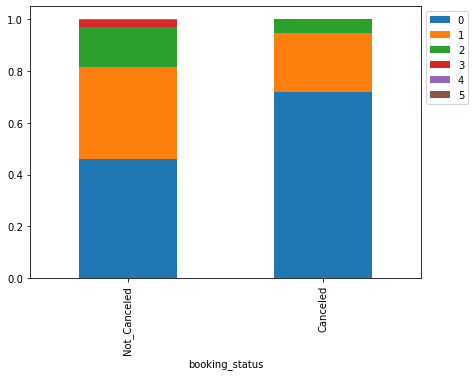

In [65]:
stacked_barplot(inn, 'booking_status', 'no_of_special_requests')

### Observation: 
 
* As shown above customers who were provided with more than 3 special requirements shows zero percent cancellation.
* customers who were provided with no special requirements show 43% cancellation status.
* It is an indicator for hotels to be able to accept and provide special requirement to the customers in order to avoid cancellations.

### Multi variate Analysis 

#### Performing  multi variate analysis to check the distribution and correlation between the variables

### Type of plots used 

####  * Histogram plot
####  * Pairplot
####  * Heatmap 

### Check for distribution and Correlation

In [66]:
# creating a copy of the DF
hotels= inn.copy()

In [67]:
#  Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis for the column "Booking status"
hotels["booking_status"] = hotels["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### Histogram 

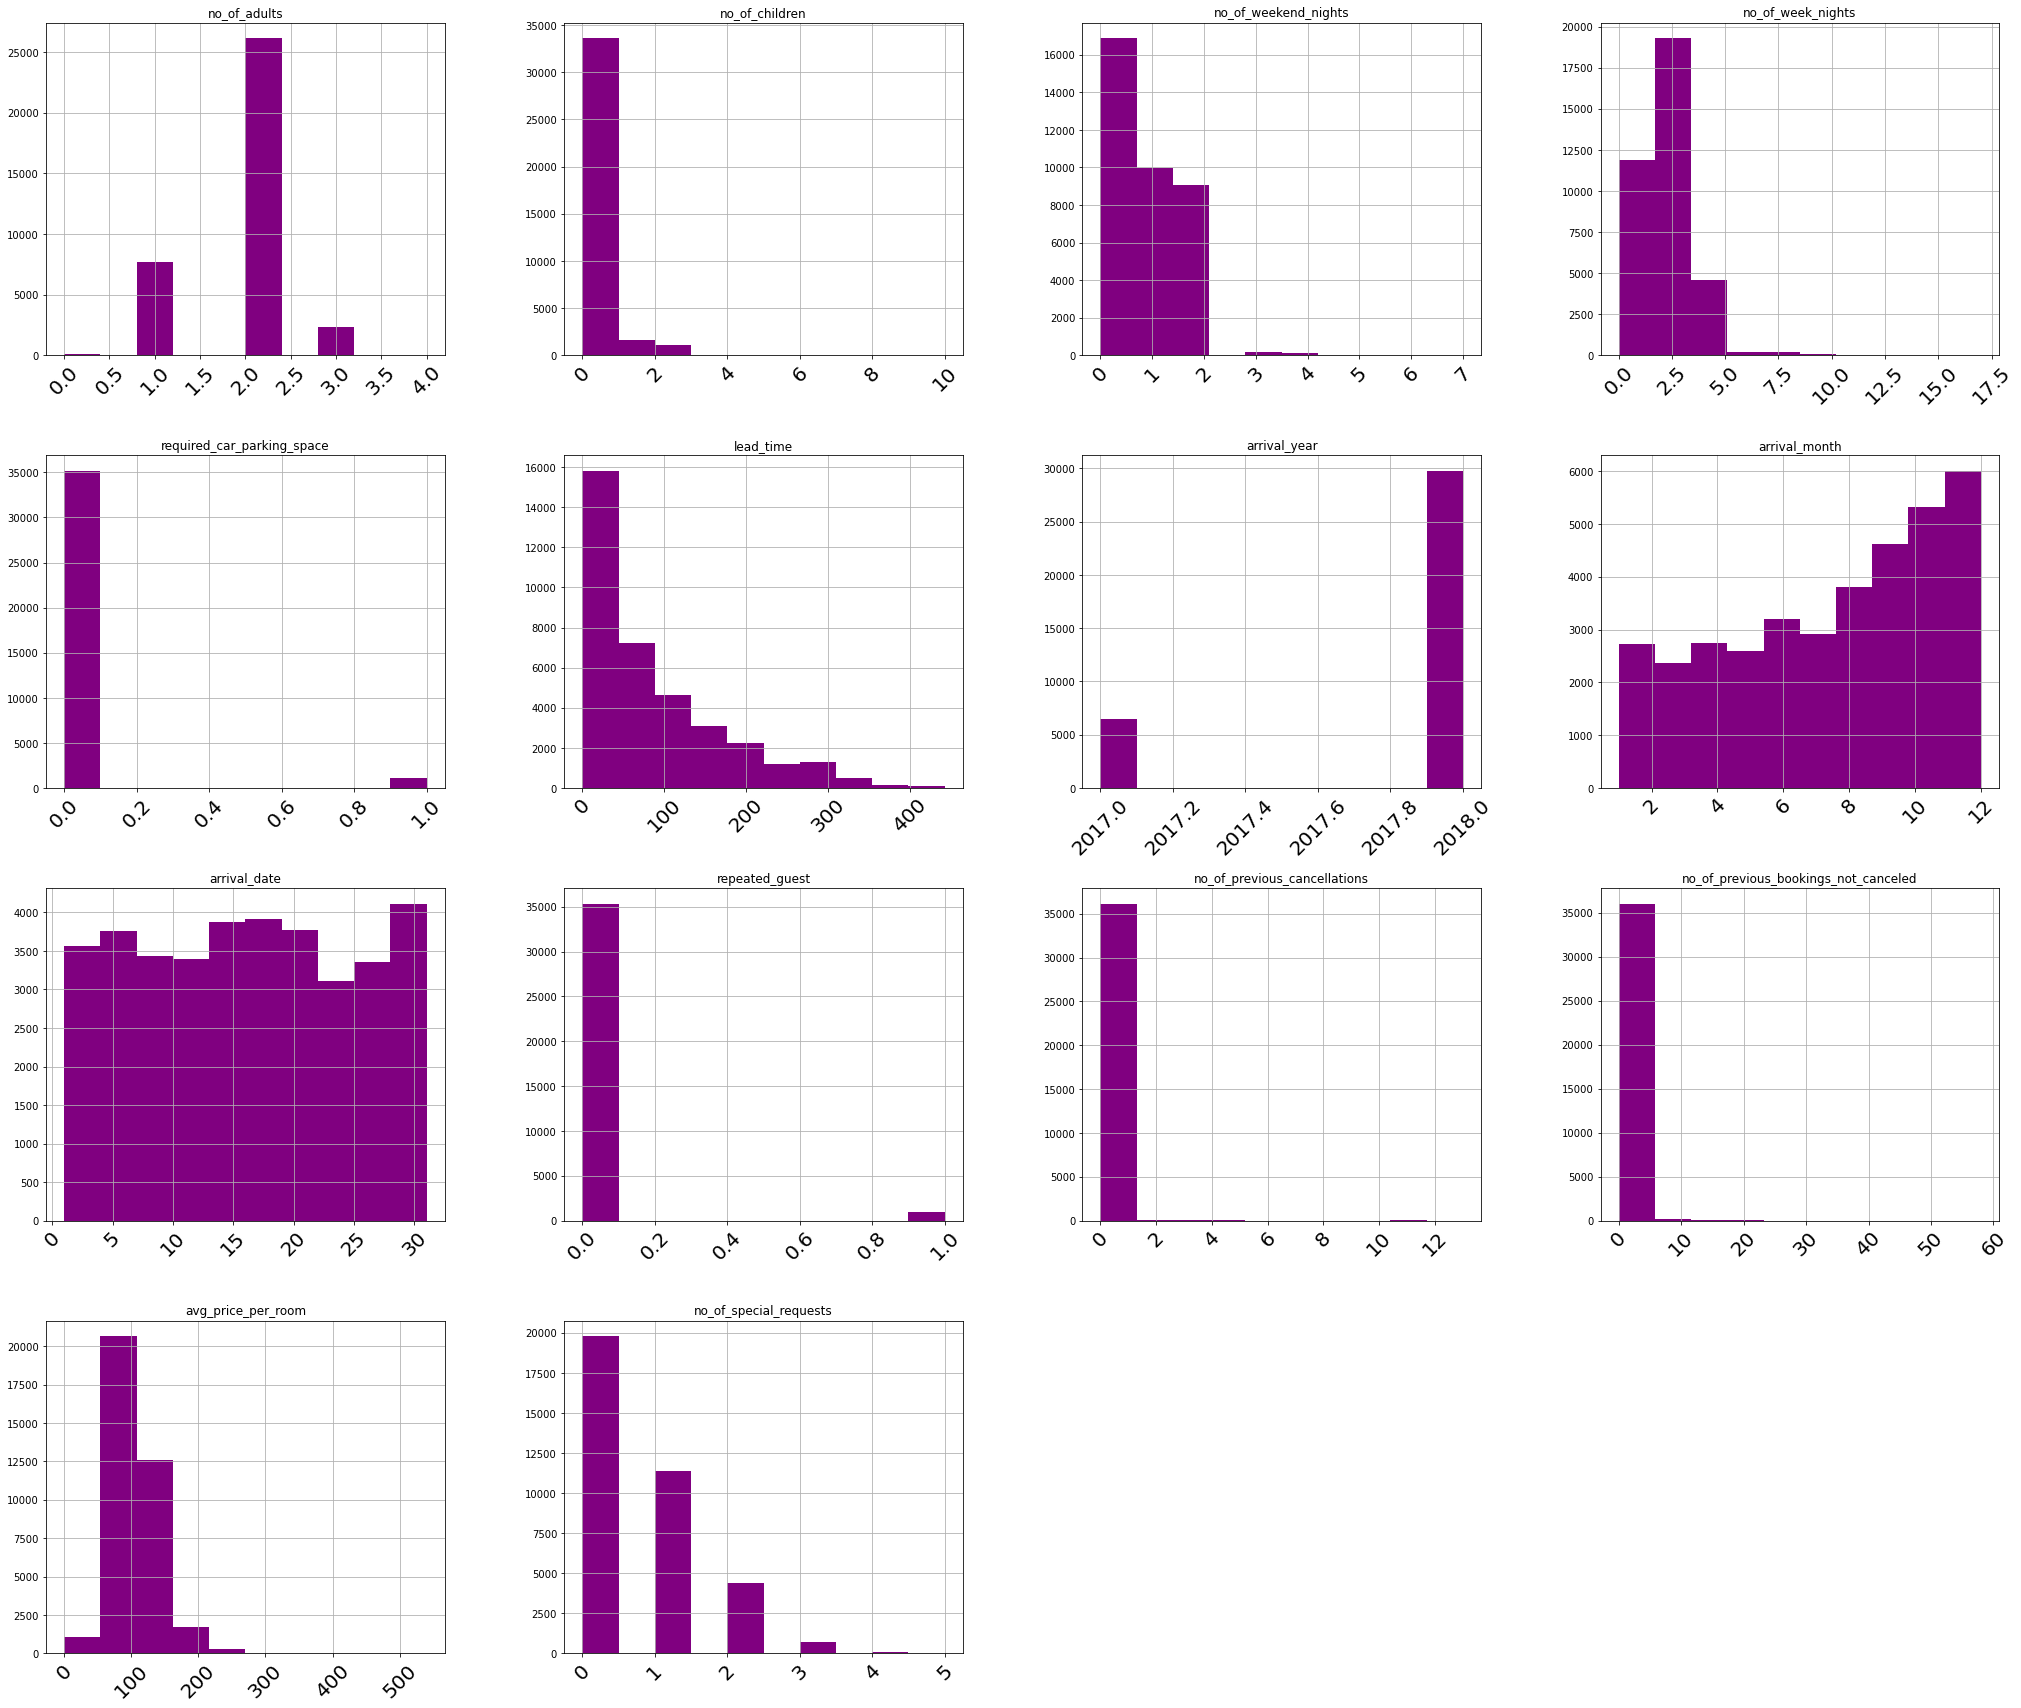

In [68]:
hotels.hist(figsize=(35,30),bins=10,color="purple",xlabelsize=20, ylabelsize=10,xrot=45 )
plt.show()

### Observation
* Avg price per room and lead time somewhat show normal distribution.
* Also,as seen in the above plots there are extreme values and outliers which needs to be treated.

### Pairplot

<Figure size 1080x720 with 0 Axes>

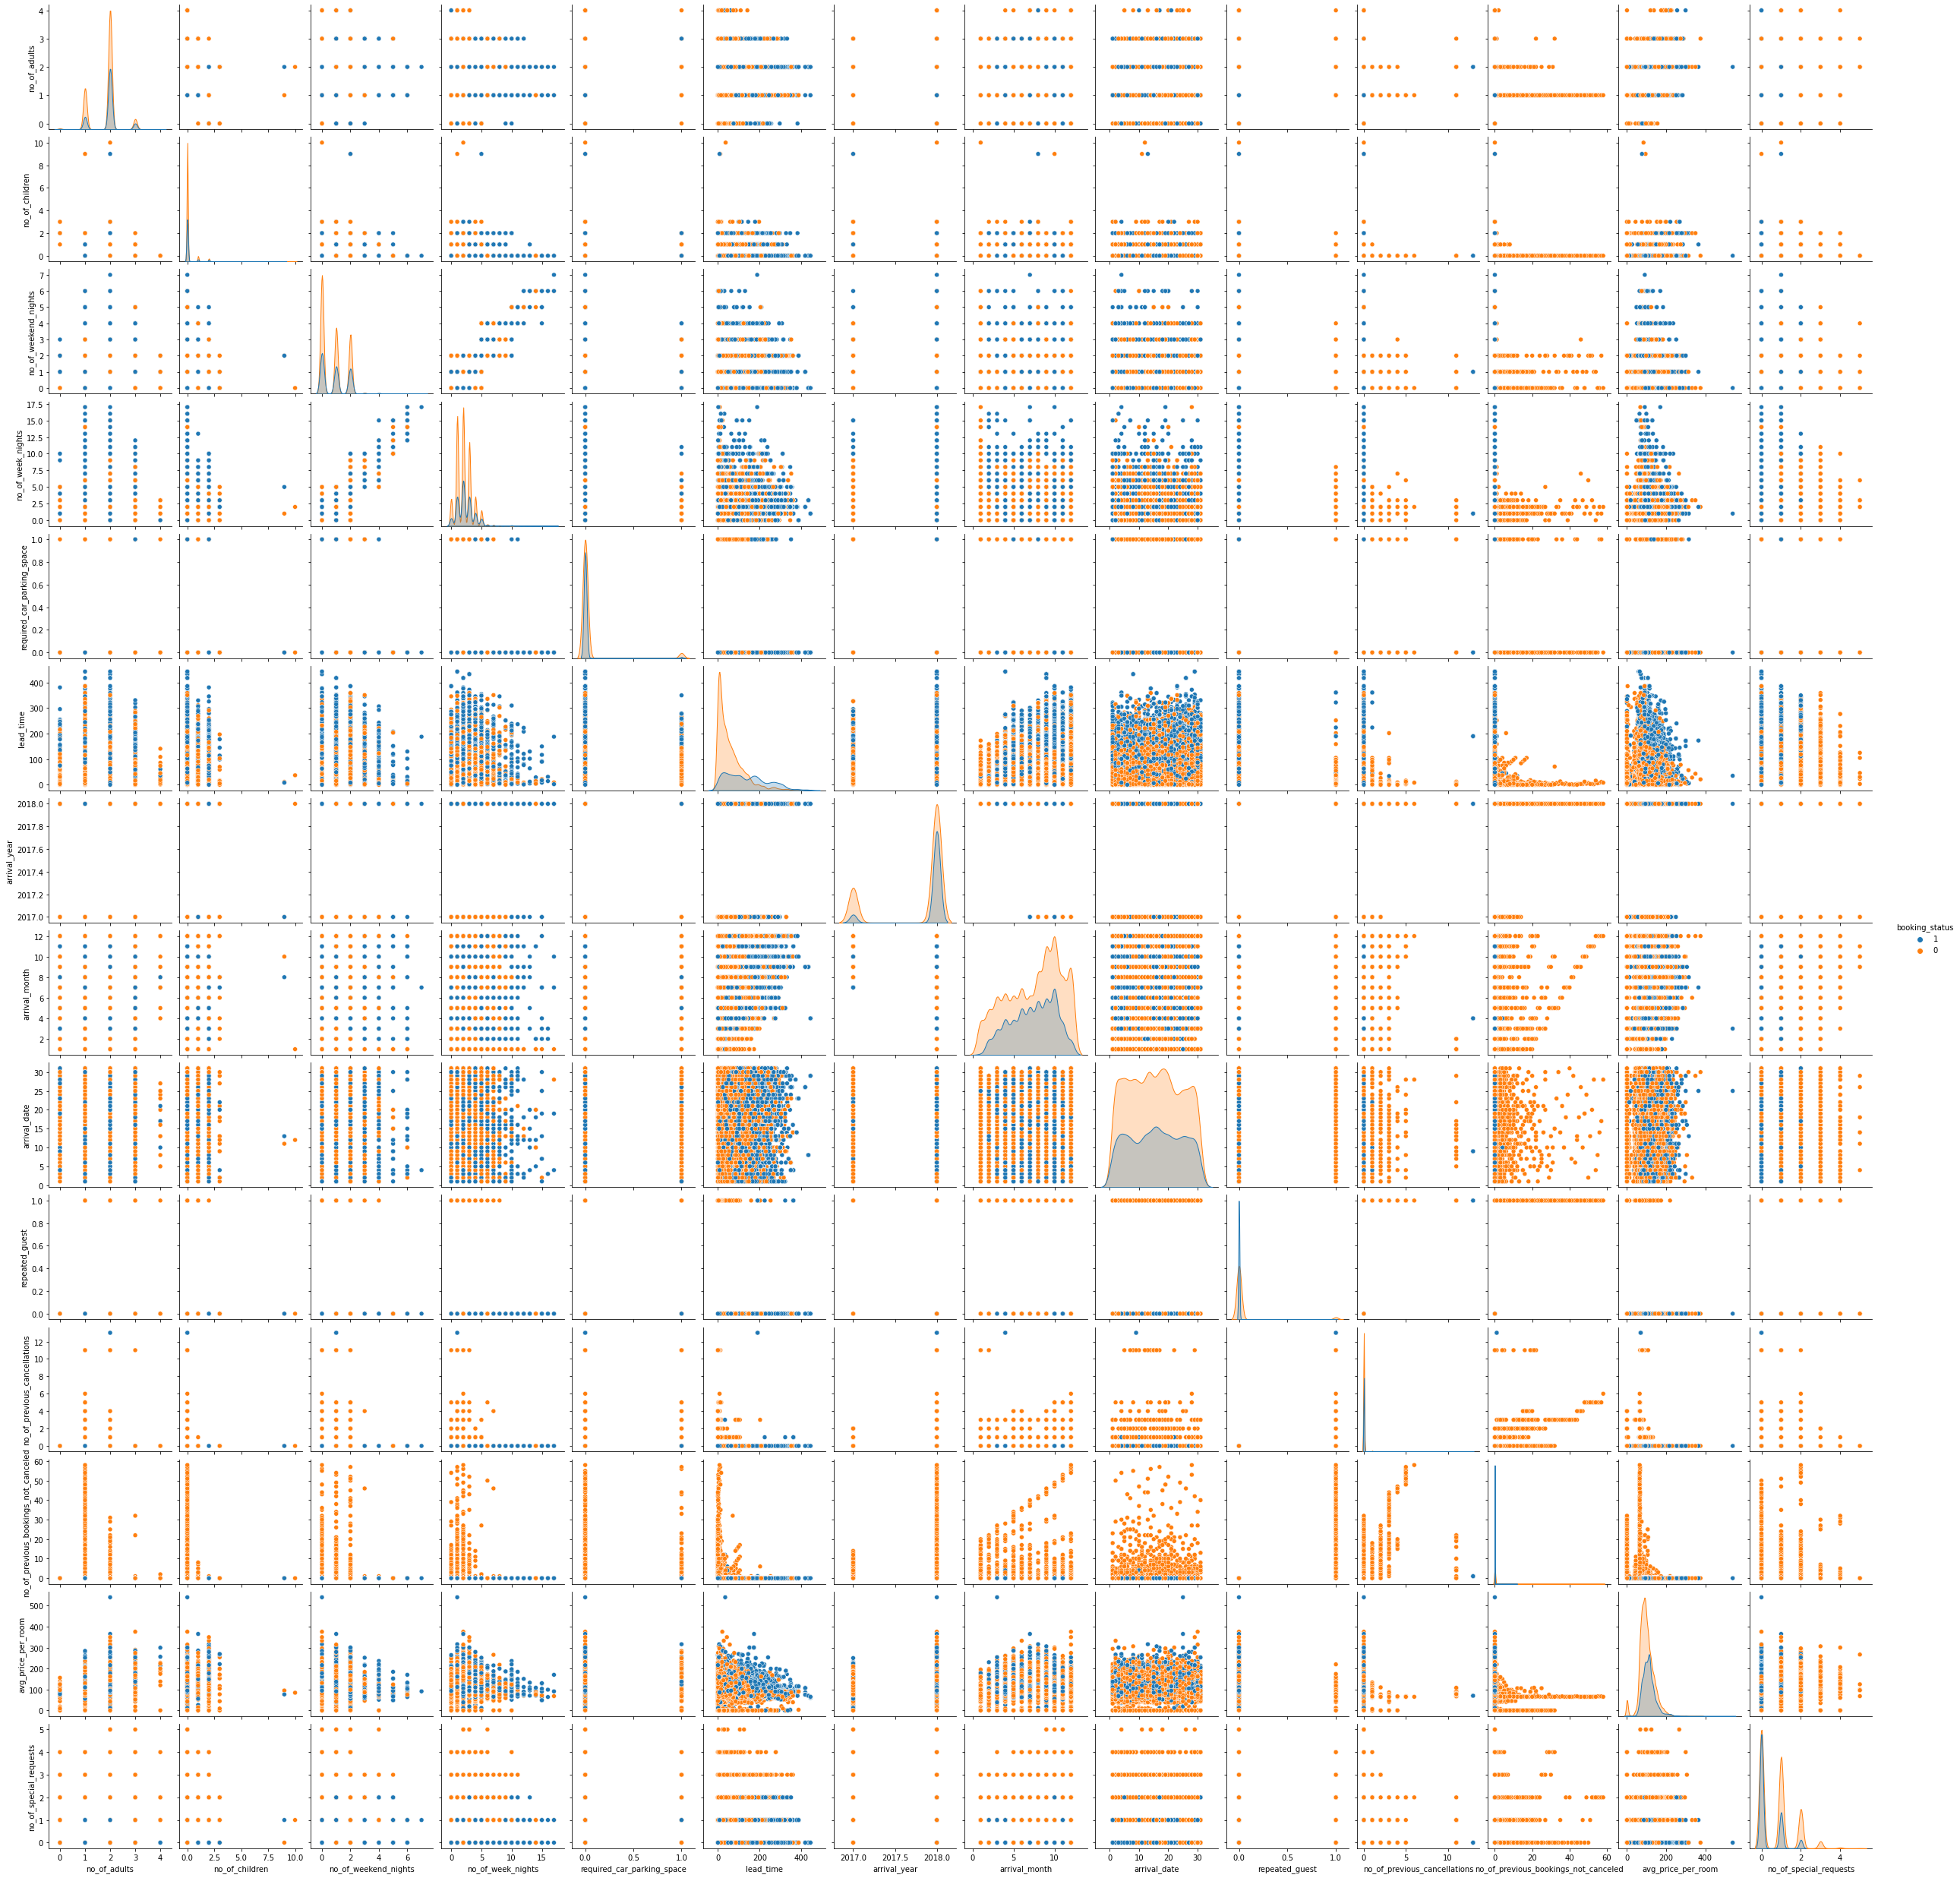

In [186]:
plt.figure(figsize=(15,10))
sns.pairplot(hotels, hue = "booking_status")
plt.show()

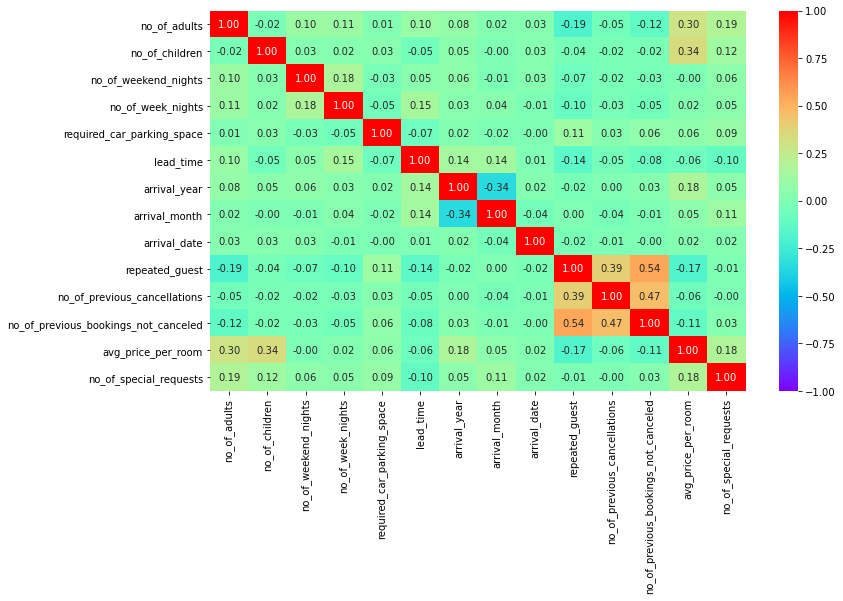

In [70]:
plt.figure(figsize=(12, 7))
sns.heatmap(
        hotels.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="rainbow"
)
plt.show()

### Observation
* There is not linear relation between the variables.
* some of them show a pattern of linear relationship but is not perfectly showing any linear relation.
* There isnt high correlation observed between the variables
* However, the highest correlation observed is between repeated_guests and no_of_previous_not cancelled.

# Summary of the EDA

#### Data Description:

* There are 36275 Rows and 19 Columns
* There a 5 object dtypes , 1 Float dtype and 13 Int dtypes in total
* dropping the first column
* changed all object dtypes  to category dtypes
* No duplicate values found
* No null/Missing values found


#### Observations from EDA:

* most of the bookings are for 2 adults.
* No of children shows value 10 which could be one odd case or data entry error.
* Most of the bookings have 0 children.
* most of the data shows 0 weekend nights i.e guests have not stayed for the night and has some effect on booking status.
* Most of the data is around 2 week nights. Higher the weeknights booked higher chances of cancellation is observed. Has some effect on booking status.
* 4 different meal plans. Most of the preferred type of meal is meal plan 1. 
* 7 types of reserved rooms. Room 1 is highly preferred.might have some effect on booking status
* Avg lead time is 85 days. Min lead time is 0 days. Max lead time is 443 days which could possibly result in an outlier. Lead time defintely has an effect on booking status.
* Arrival year is mostly around 2017 and 2018.Most of the booking are seen for the year 2018.
* month 10 , October has most of the bookings. 7th month followed by 6th month has higher booking cancellations when compared to the other months.
* 5 different market segments.Online segment has the highest bookings also contributes to highest booking cancellations followed by other segments. market segment definitely has an effect on Booking status.
* very less percentage of repeated guests and cancellation from the repeated guests is also very low. Non-repeated guest contribute to high booking cancellations.Repeated guests definitely influence booking status.
* No of previous cancellations  has a unique value which is an outlier and needs to treated.Also, the customers with previous cancellations has chances of booking again.
* Any customer who has previously booked and not cancelled will surely not cancel in the future bookings. surely influences the booking status
* customers provided with high number of special requirements has zero cancellations.Special requirements have some effect on booking status
* Avg price per room is 103.42 Euros.Min room price is 35 Euros and max room price is 540. Outliers needs to be treated.


#### Data that requires Preprocessing:
* no of children column has extreme values 9 and 10.
* Column avg price per room  has one unique value price > 500  and needs to be treated.
* Need to check if any columns require log tranformation
* column lead_time and avg_price_per_room should shows outliers and needs outlier treatment.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [71]:
# creating a copy of the data frame 
df = hotels.copy()

In [72]:
# checking for missing values
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### Obsevation : There are no missing values in the data and no missing value treatment is needed.

# outlier treatment

#### no of children column has extreme values 9 and 10 .Replacing 9, and 10 children with 3

In [73]:

df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

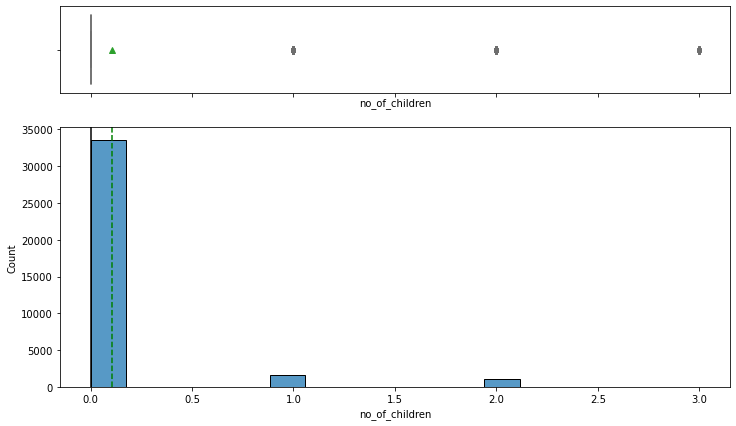

In [74]:
histogram_boxplot(df, 'no_of_children')

### Observation :
* Extreme values have been replaced by the value 3

####  Treating the column avg price per room which has one unique outlier 500 Euros. Treating and replacing it with upper whisker

In [75]:
# calculating 25 quantile
Q1 = df['avg_price_per_room'].quantile(0.25)

# calculating 75 quantile
Q3 = df['avg_price_per_room'].quantile(0.75)

# calculating IQR 
IQR = Q3-Q1

# calculating upper whisker
upper_whisk = Q3 +1.5 *IQR
upper_whisk

179.55

In [76]:
# checking for columns which has price greater than 500 
great = df[df["avg_price_per_room"] >= 500]
great

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
33114             2               0                     0                  1   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
33114       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
33114         35          2018              3            25   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
33114             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
33114                                     0           540.00000   

       no_of_special_requests booking_status  
33114                       0              1

In [77]:
# found only one column with value > 500 and replacing it with upper whisk we calculated
df["avg_price_per_room"] = df["avg_price_per_room"].replace([540], upper_whisk)

In [78]:
# checking if the value has been replaced by the upper whisker
df.loc[33114,'avg_price_per_room']

179.55

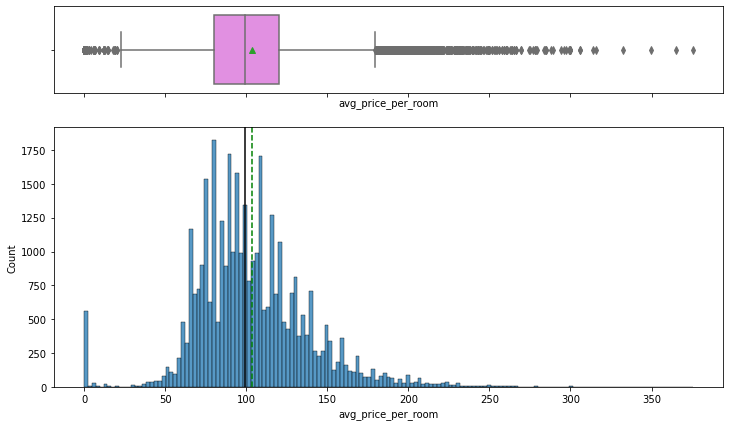

In [79]:
histogram_boxplot(df , 'avg_price_per_room')

### Observation : The 500 value has been replaced and it doesnt show in the data any more

### Feature engineering 

### Log Tranformation


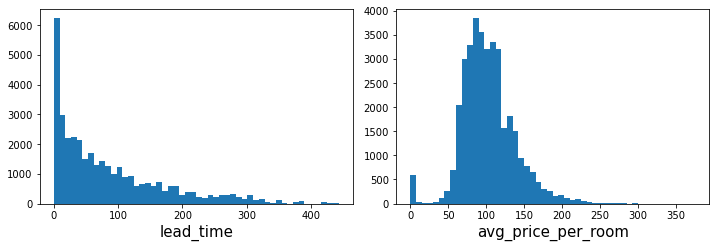

In [80]:
# checking the columns distribution 

# Checking for plots before log tranformation

columns_plot = [
    "lead_time",
    "avg_price_per_room",
    
]

plt.figure(figsize=(15, 30))

for i in range(len(columns_plot)):
    plt.subplot(9, 3, i + 1)
    plt.hist(df[columns_plot[i]], bins=50)
    plt.tight_layout()
    plt.xlabel(columns_plot[i], fontsize=15)

plt.show()

### Observation :
* Avg price columns almost shows normal distribution.
* Lead time column is definitely right skewed. However, considering it a real time data where guests actually book in advance for the most important seasons like october which usually shows busy month and might lead to lot of missing data.
* Hence, no log transformation on any of the columns.

###  Outlier detection and treatment

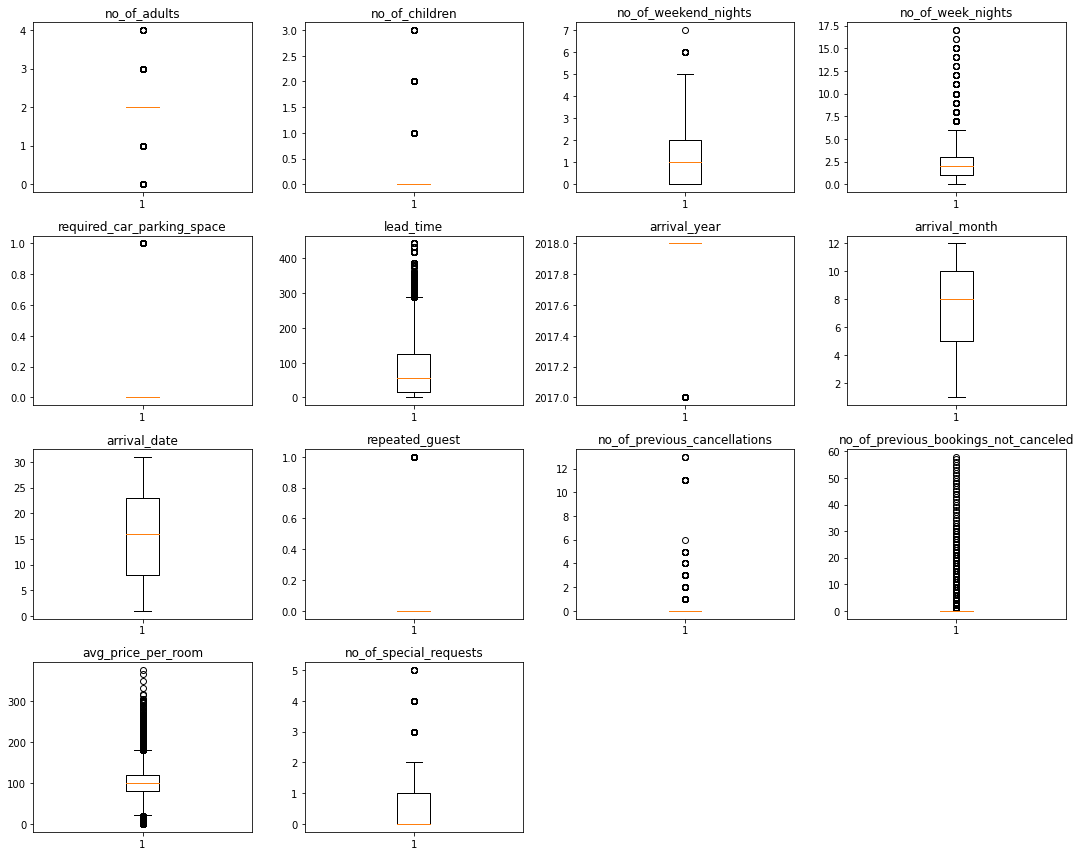

In [81]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
#numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Observation: 

* columns lead time and avg price show outliers and needs to be treated

In [82]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df

def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df


In [83]:
# creating a list of columns that needs to to be treated
treat_out_cols = ["lead_time", "avg_price_per_room"]

# Applying the function
new_df = treat_outliers_all(df, treat_out_cols)


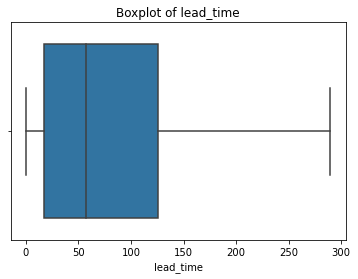

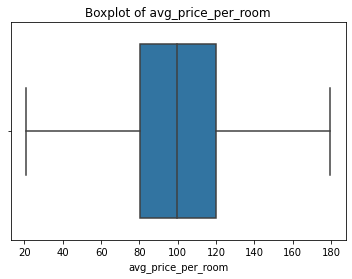

In [84]:
    # checking individually for outliers with box plots 
    sns.boxplot(new_df['lead_time'])
    plt.title('Boxplot of lead_time')
    plt.show()

    sns.boxplot(new_df['avg_price_per_room'])
    plt.title('Boxplot of avg_price_per_room')
    plt.show()

### Observation : Outliers have been treated.

### Data Preparation for modeling
- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.


In [85]:
# Creating Training and data sets
X = new_df.drop(['booking_status'], axis = 1)
y = new_df['booking_status']

# creating dummy variables for all the categoricals columns

X = pd.get_dummies(,
    X,
    columns=X.select_dtypes(include=["object","category"]).columns.tolist(),
    drop_first=True,
    
)

X= X.astype(float)

# let's add the intercept to data
X = sm.add_constant(X, has_constant='add')
X.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0 1.00000       2.00000         0.00000               1.00000   
1 1.00000       2.00000         0.00000               2.00000   
2 1.00000       1.00000         0.00000               2.00000   
3 1.00000       2.00000         0.00000               0.00000   
4 1.00000       2.00000         0.00000               1.00000   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0            2.00000                     0.00000  224.00000    2017.00000   
1            3.00000                     0.00000    5.00000    2018.00000   
2            1.00000                     0.00000    1.00000    2018.00000   
3            2.00000                     0.00000  211.00000    2018.00000   
4            1.00000                     0.00000   48.00000    2018.00000   

   arrival_month  arrival_date  repeated_guest  no_of_previous_cancellations  \
0       10.00000       2.00000         0.00000                       0.00000   
1       11.00000       6.00000         0.00000                       0.00000   
2        2.00000      28.00000         0.00000                       0.00000   
3        5.00000      20.00000         0.00000                       0.00000   
4        4.00000      11.00000         0.00000                       0.00000   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                               0.00000            65.00000   
1                               0.00000           106.68000   
2                               0.00000            60.00000   
3                               0.00000           100.00000   
4                               0.00000            94.50000   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                 0.00000                        0.00000   
1                 1.00000                        0.00000   
2                 0.00000                        0.00000   
3                 0.00000                        0.00000   
4                 0.00000                        0.00000   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                        0.00000                         0.00000   
1                        0.00000                         1.00000   
2                        0.00000                         0.00000   
3                        0.00000                         0.00000   
4                        0.00000                         1.00000   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                         0.00000                         0.00000   
1                         0.00000                         0.00000   
2                         0.00000                         0.00000   
3                         0.00000                         0.00000   
4                         0.00000                         0.00000   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                         0.00000                         0.00000   
1                         0.00000                         0.00000   
2                         0.00000                         0.00000   
3                         0.00000                         0.00000   
4                         0.00000                         0.00000   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                         0.00000                         0.00000   
1                         0.00000                         0.00000   
2                         0.00000                         0.00000   
3                         0.00000                         0.00000   
4                         0.00000                         0.00000   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                            0.00000                        0.00000   
1                            0.00000                        0.00000   
2                            0.00000                        0.

In [86]:
# splitting data in to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3, random_state= 1)

In [87]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


## EDA after Data Pre processing

- It is a good idea to explore the data once again after manipulating it.

### Univariate Analysis

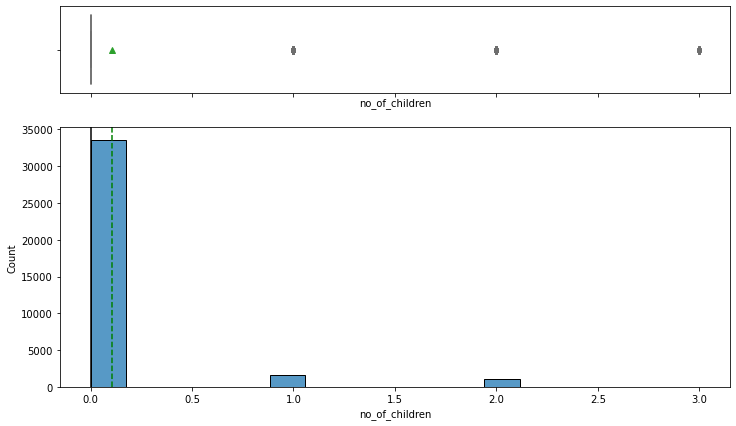

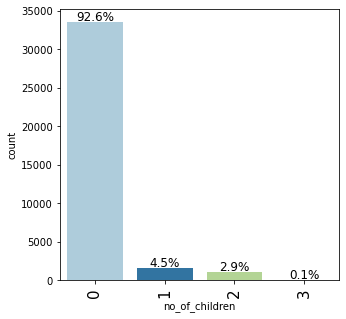

In [88]:
## Lets check the column no of children after replacing the exterme values with 3 

histogram_boxplot(new_df , 'no_of_children')
labeled_barplot(new_df , 'no_of_children',perc=True)

### Observation 
* Post treatment the highest value is 3 

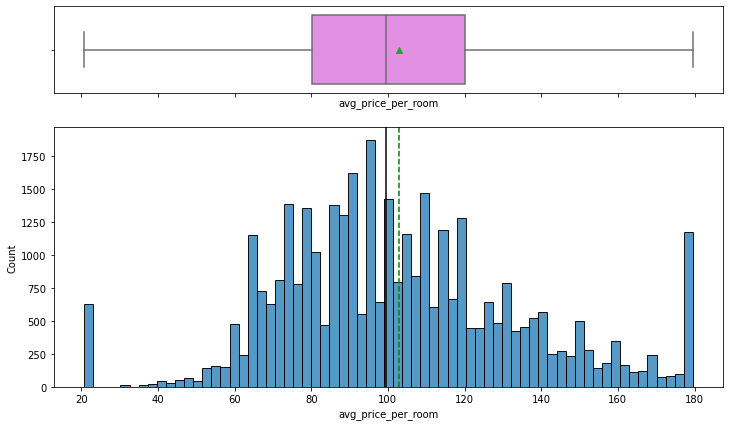

In [89]:
# Lets check the column avg_price_per_room after treating all the values greater than with upper whiskers

histogram_boxplot(new_df , 'avg_price_per_room')

### Observation : 
* As you can see all the values are under 180.
* extreme values  and Outliers have been treated 

In [90]:
# lets check columns lead _time and avg_price_room after the outliers have been treated

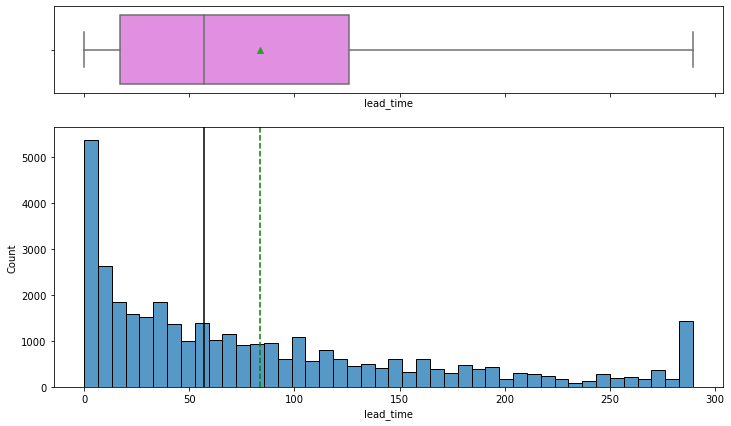

In [91]:
histogram_boxplot(
    new_df, "lead_time")


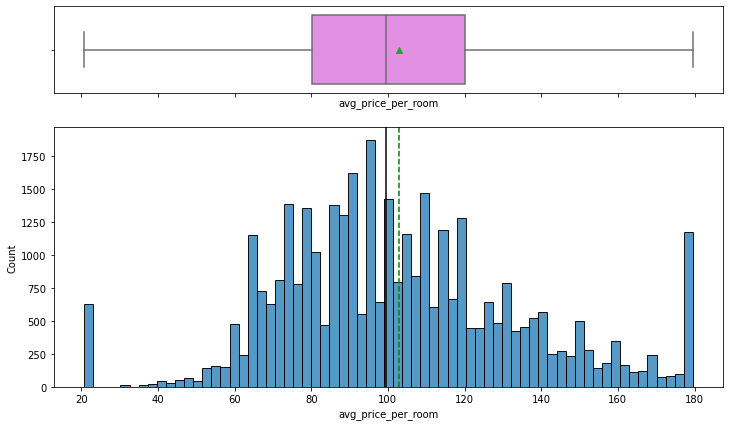

In [92]:
histogram_boxplot(
    new_df, "avg_price_per_room")

### Observation : 
* As you can see the outliers have been treated 

### Bivariate Analysis

####  Bivariate analysis of lead time against booking_status after outlier treatment

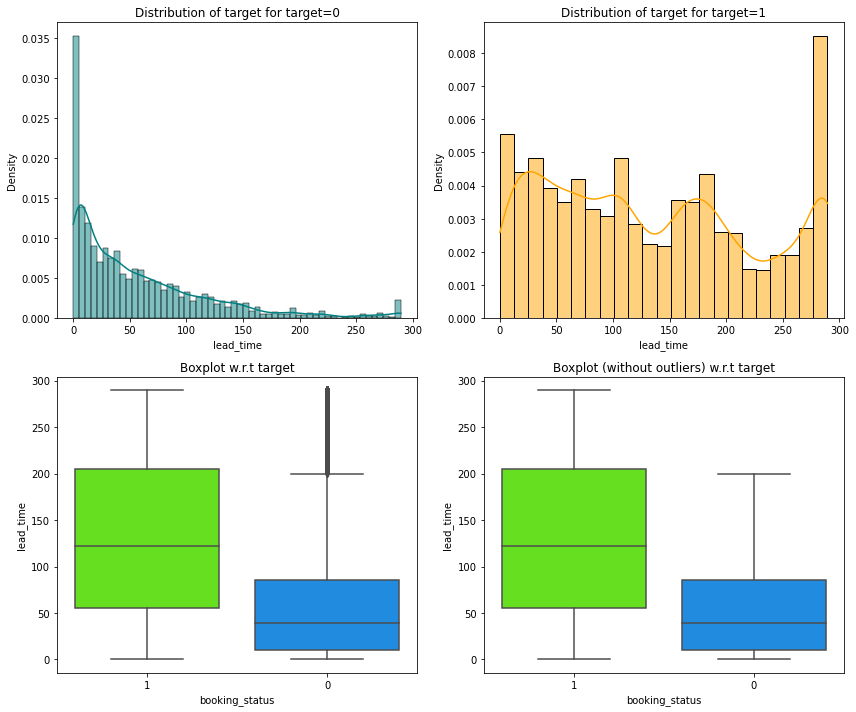

In [93]:
distribution_plot_wrt_target(new_df, 'lead_time', 'booking_status')

### Observation

* Post the outlier treatment the max lead time is under 300.

#### Bivariate analysis of avg_price_per_room against booking_status after outlier treatment

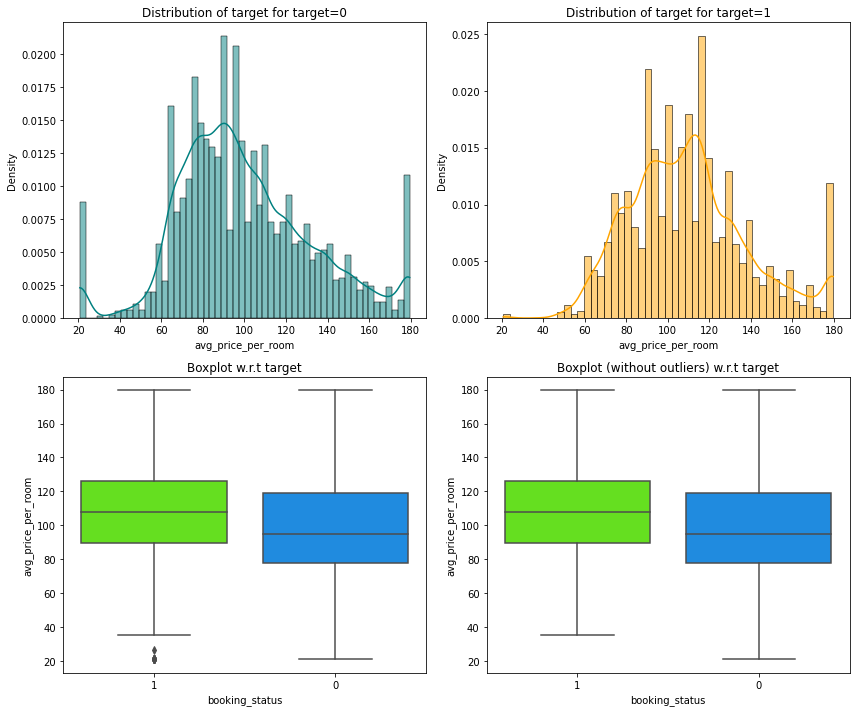

In [94]:
distribution_plot_wrt_target(new_df, 'avg_price_per_room', 'booking_status')

### Observation
* Post the treatment the max avg price us under 180.

###  Plotting Heat map to check the correlation post data Pre processing 

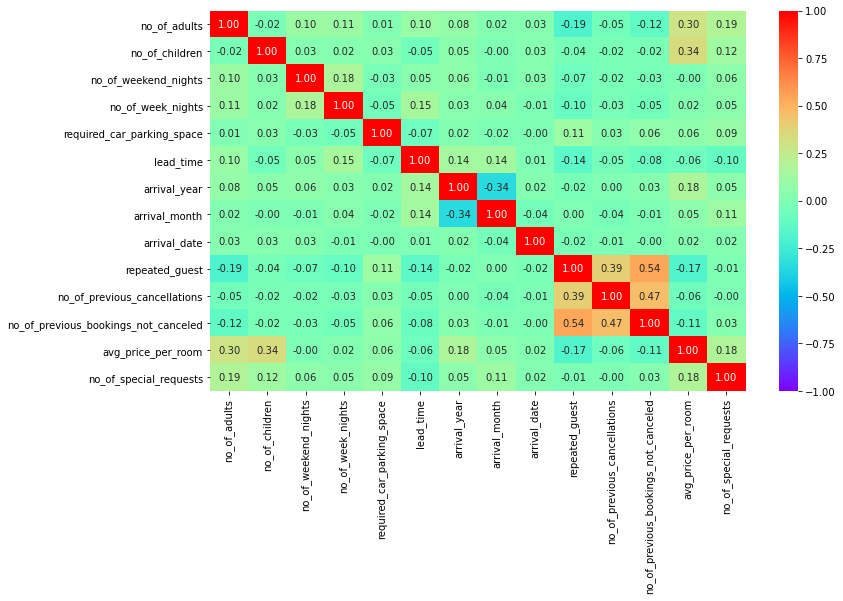

In [95]:
plt.figure(figsize=(12, 7))
sns.heatmap(
        hotels.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="rainbow"
)
plt.show()

### Observation 
* Not much of change is observed in the Heatmap after data pre processing.

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [96]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [97]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building a Logistic Regression model

In [98]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 25 Mar 2022   Pseudo R-squ.:                  0.3301
Time:                        12:49:38   Log-Likelihood:                -10780.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -983.3214    121.025     -8.125      0.000   -1220.526    -746.116
no_of_adults                             0.1112      

In [99]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80573 0.63697    0.73740 0.68352

#### Observations

* Negative values of the coefficient shows that probability of customer cancelling the booking decreases with the increase of corresponding attribute value.
* Positive values of the coefficient show that that probability of customer cancelling the booking increases with the increase of corresponding attribute value.
* p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.
* But these variables might contain multicollinearity, which will affect the p-values.
* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.
* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [100]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [101]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [102]:
checking_vif(X_train)

feature            VIF
0                                  const 39383287.08537
1                           no_of_adults        1.35303
2                         no_of_children        2.08841
3                   no_of_weekend_nights        1.07071
4                      no_of_week_nights        1.09914
5             required_car_parking_space        1.03971
6                              lead_time        1.38651
7                           arrival_year        1.42780
8                          arrival_month        1.27426
9                           arrival_date        1.00667
10                        repeated_guest        1.78440
11          no_of_previous_cancellations        1.39568
12  no_of_previous_bookings_not_canceled        1.65200
13                    avg_price_per_room        1.96862
14                no_of_special_requests        1.24879
15         type_of_meal_plan_Meal Plan 2        1.26194
16         type_of_meal_plan_Meal Plan 3        1.02517
17        type_of_meal_plan_Not Selected        1.27776
18        room_type_reserved_Room_Type 2        1.10698
19        room_type_reserved_Room_Type 3        1.00330
20        room_type_reserved_Room_Type 4        1.37273
21        room_type_reserved_Room_Type 5        1.02816
22        room_type_reserved_Room_Type 6        2.01523
23        room_type_reserved_Room_Type 7        1.09667
24     market_segment_type_Complementary        4.44973
25         market_segment_type_Corporate       16.93070
26           market_segment_type_Offline       64.13860
27            market_segment_type_Online       71.20324

### Observation

* There is no more VIF above 5 . ignoring the categorical variables with high VIF.

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [116]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [117]:
X_train2 = X_train[selected_features]
X_test2 = X_test[selected_features]

In [118]:
logit1 = sm.Logit(y_train, X_train2.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 25 Mar 2022   Pseudo R-squ.:                  0.3290
Time:                        12:55:52   Log-Likelihood:                -10797.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -976.6412    120.653     -8.095      0.000   -1213.116    -740.166
no_of_adults                       0.1056      0.037      2.824      0.

### Observation : 
* All the columns with p value > 0.05 has been treated.

### Coefficient interpretations
 * Negative coefficients will result in decrease of booking cancellations.
 * Postive coefficients will increase in booking cancellations.
 * for example : Repeated guests, no_of_special_requests, required_car_parking_space and other -ve coefficients most likely will not cancel their booking.
 

In [119]:
### comparing perfomance scores on both the models 

# model 1 
print("Training performance model 1 :")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance model 1 :


Accuracy  Recall  Precision      F1
0   0.80573 0.63697    0.73740 0.68352

In [120]:
# model performance on training data post VIF treatment

# model 2 
print("Training performance model 2 :")
model_performance_classification_statsmodels(lg1,X_train2, y_train)

Training performance model 2 :


Accuracy  Recall  Precision      F1
0   0.80553 0.63590    0.73748 0.68293

### Obsevration: 
* There isnt any significant changes in scores.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [121]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.11141         1.17710               1.11344   
Change_odd% -100.00000      11.14062        17.71036              11.34437   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04033                     0.20037    1.01648   
Change_odd%            4.03321                   -79.96268    1.64753   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.62006        0.96006         0.07629   
Change_odd%      62.00567       -3.99450       -92.37114   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.24393             1.02059   
Change_odd%                      24.39323             2.05857   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.22866                        1.27735   
Change_odd%               -77.13417                       27.73511   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.35969                         0.70388   
Change_odd%                        35.96852                       -29.61159   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.74282                         0.47810   
Change_odd%                       -25.71821                       -52.18976   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.48253                         0.46132   
Change_odd%                       -51.74660                       -53.86792   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.46853                      0.16977  
Change_odd%                      -53.14739                    -83.02305

### Observations: 

* no_of_adults: Holding all other features constant a unit change in no_of_adults will increase the odds of booking cancellations by 11%.
* no_of_children Holding all other features constant a unit change in no_of_children will increase the odds of booking cancellations by 17%.
* no_of_weekend_nights - Holding all other features constant a unit change  will increase the odds of booking cancellations by 11%.
* no_of_week_nights-Holding all other features constant a unit change  will increase the odds of booking cancellations by 4%. 
* required_car_parking_space - Holding all other features constant a unit change will decrease the odds of booking cancellations by 79%
* repeated_guest - Holding all other features constant a unit change will decrease the odds of booking cancellations by 92%.
* no_of_special_requests, Room type   a a unit change in these will decrease the odds of booking cancellations.

## Model performance evaluation

#### Checking model performance on the training set

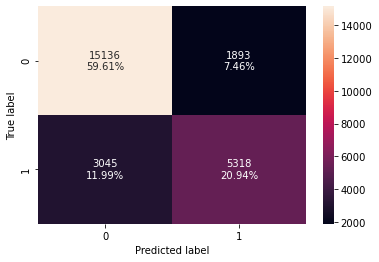

In [122]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train2, y_train)

In [123]:
print("Training performance model 2:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train2, y_train)
log_reg_model_train_perf

Training performance model 2:


Accuracy  Recall  Precision      F1
0   0.80553 0.63590    0.73748 0.68293

#### ROC-AUC
* ROC-AUC on training set

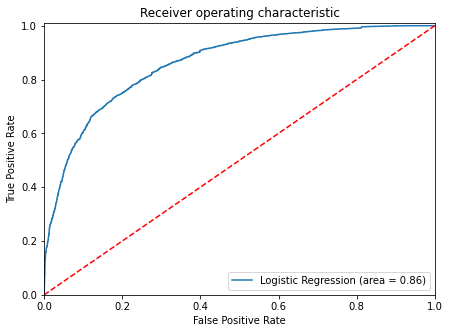

In [124]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Observation : 
* Logistic Regression model is giving a good performance on training set.

### Model Performance Improvement

* Let's see if the scores can be improved further, by changing the model threshold using AUC-ROC Curve.

In [125]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37136974976189724


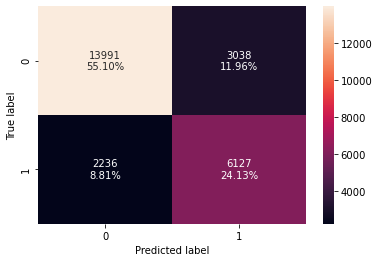

In [126]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1,X_train2, y_train,threshold=optimal_threshold_auc_roc)

In [127]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79230 0.73263    0.66852 0.69911

#### Let's use Precision-Recall curve and see if we can find a better threshold

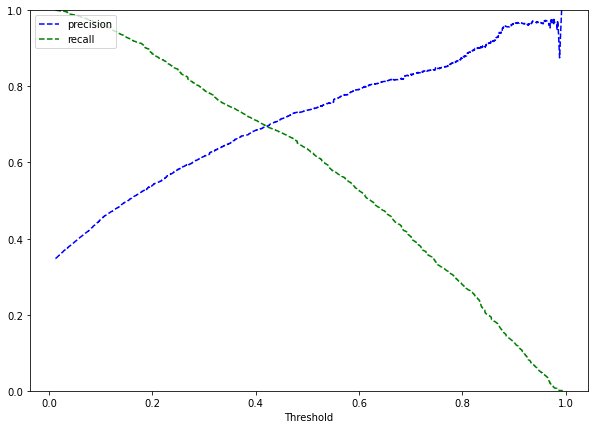

In [128]:
y_scores = lg1.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [129]:
# setting the threshold
optimal_threshold_curve = 0.42

#### Checking model performance on training set

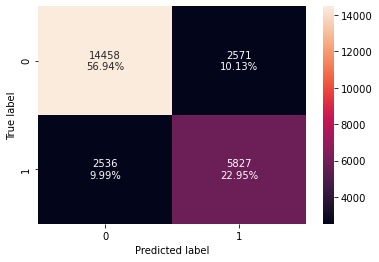

In [130]:
# creating confusion matrix
confusion_matrix_statsmodels( lg1, X_train2,y_train, threshold=optimal_threshold_curve)

In [131]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.79887 0.69676    0.69386 0.69530

### Let's check the performance on the test set

**Using model with default threshold**

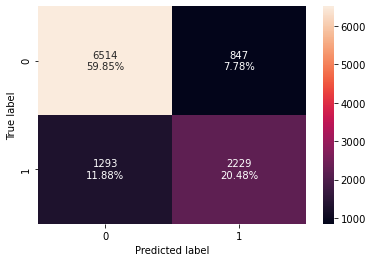

In [136]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1,X_test2,y_test)

In [137]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1,X_test2,y_test)

print("Test performance:")
log_reg_model_test_perf 

Test performance:


Accuracy  Recall  Precision      F1
0   0.80336 0.63288    0.72464 0.67566

* ROC curve on test set

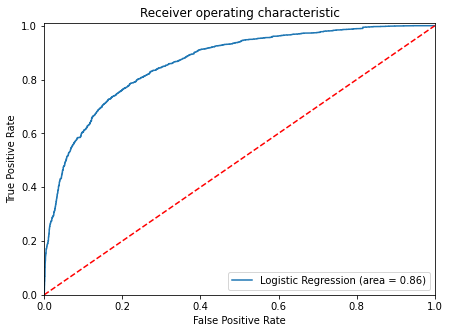

In [138]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.37** 

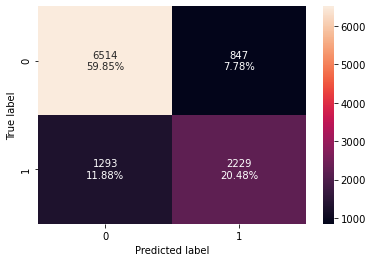

In [139]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1,X_test2,y_test)

In [140]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79629 0.73651    0.66804 0.70061

In [141]:
# setting the threshold
optimal_threshold_curve1 = 0.42

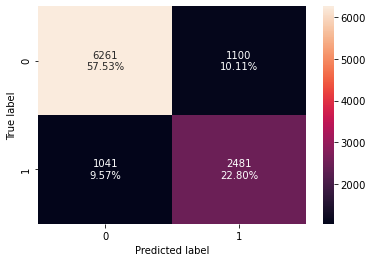

In [142]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1,X_test2,y_test,optimal_threshold_curve1 )

In [143]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80327 0.70443    0.69282 0.69858

## Final Model Summary

In [144]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80553   
Recall                                   0.63590   
Precision                                0.73748   
F1                                       0.68293   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79230   
Recall                                0.73263   
Precision                             0.66852   
F1                                    0.69911   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.79887  
Recall                                0.69676  
Precision                             0.69386  
F1                                    0.69530

In [145]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80336   
Recall                                   0.63288   
Precision                                0.72464   
F1                                       0.67566   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79629   
Recall                                0.73651   
Precision                             0.66804   
F1                                    0.70061   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80327  
Recall                                0.70443  
Precision                             0.69282  
F1                                    0.69858

###  Conclusion

* The logistic regression models have given a generalized performance on the training and test set.
* The f1 score is 0.69 on the training set.
* Higher the f1 scores helps reduce false negative and false positive.
* Coefficient that are positive,increase in these will lead to increase in chances of Predicting a customer will cancel their bookings
* Coefficient that are negative, increase in these will lead to decrease in booking cancellations

## Building a Decision Tree model

In [146]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [147]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [148]:
# splits the data for the decision tree model dtree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# creates a decision tree model with random state = 1
dec_tree = DecisionTreeClassifier(criterion="gini", random_state=1)
dec_tree.fit(X_train, y_train)  # fits the data to the model

DecisionTreeClassifier(random_state=1)

###  Checking model performance  confusion matix on Train and Test

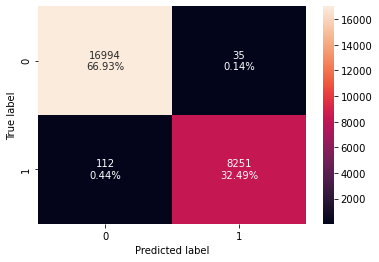

In [149]:
# confusion matrix for training data
confusion_matrix_sklearn(dec_tree,X_train, y_train)

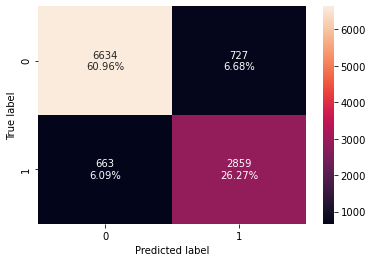

In [150]:
# confusion matrix for test data
confusion_matrix_sklearn(dec_tree,X_test,y_test)

### Checking model performance scores on Train and Test

In [151]:
# model score on Train set 
decision_tree_perf_train = model_performance_classification_sklearn(dec_tree, X_train, y_train)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

In [152]:
# model score on Test set
decision_tree_perf_test = model_performance_classification_sklearn(dec_tree,X_test,y_test)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.87228 0.81175    0.79727 0.80445

### Observation: 
* There is a huge difference in the performance scores on training set and test set, which suggests that the model is overfiiting.

## Do we need to prune the tree?

### Before pruning the tree let's check the important features.

In [153]:
feature_names = list(X_train.columns)

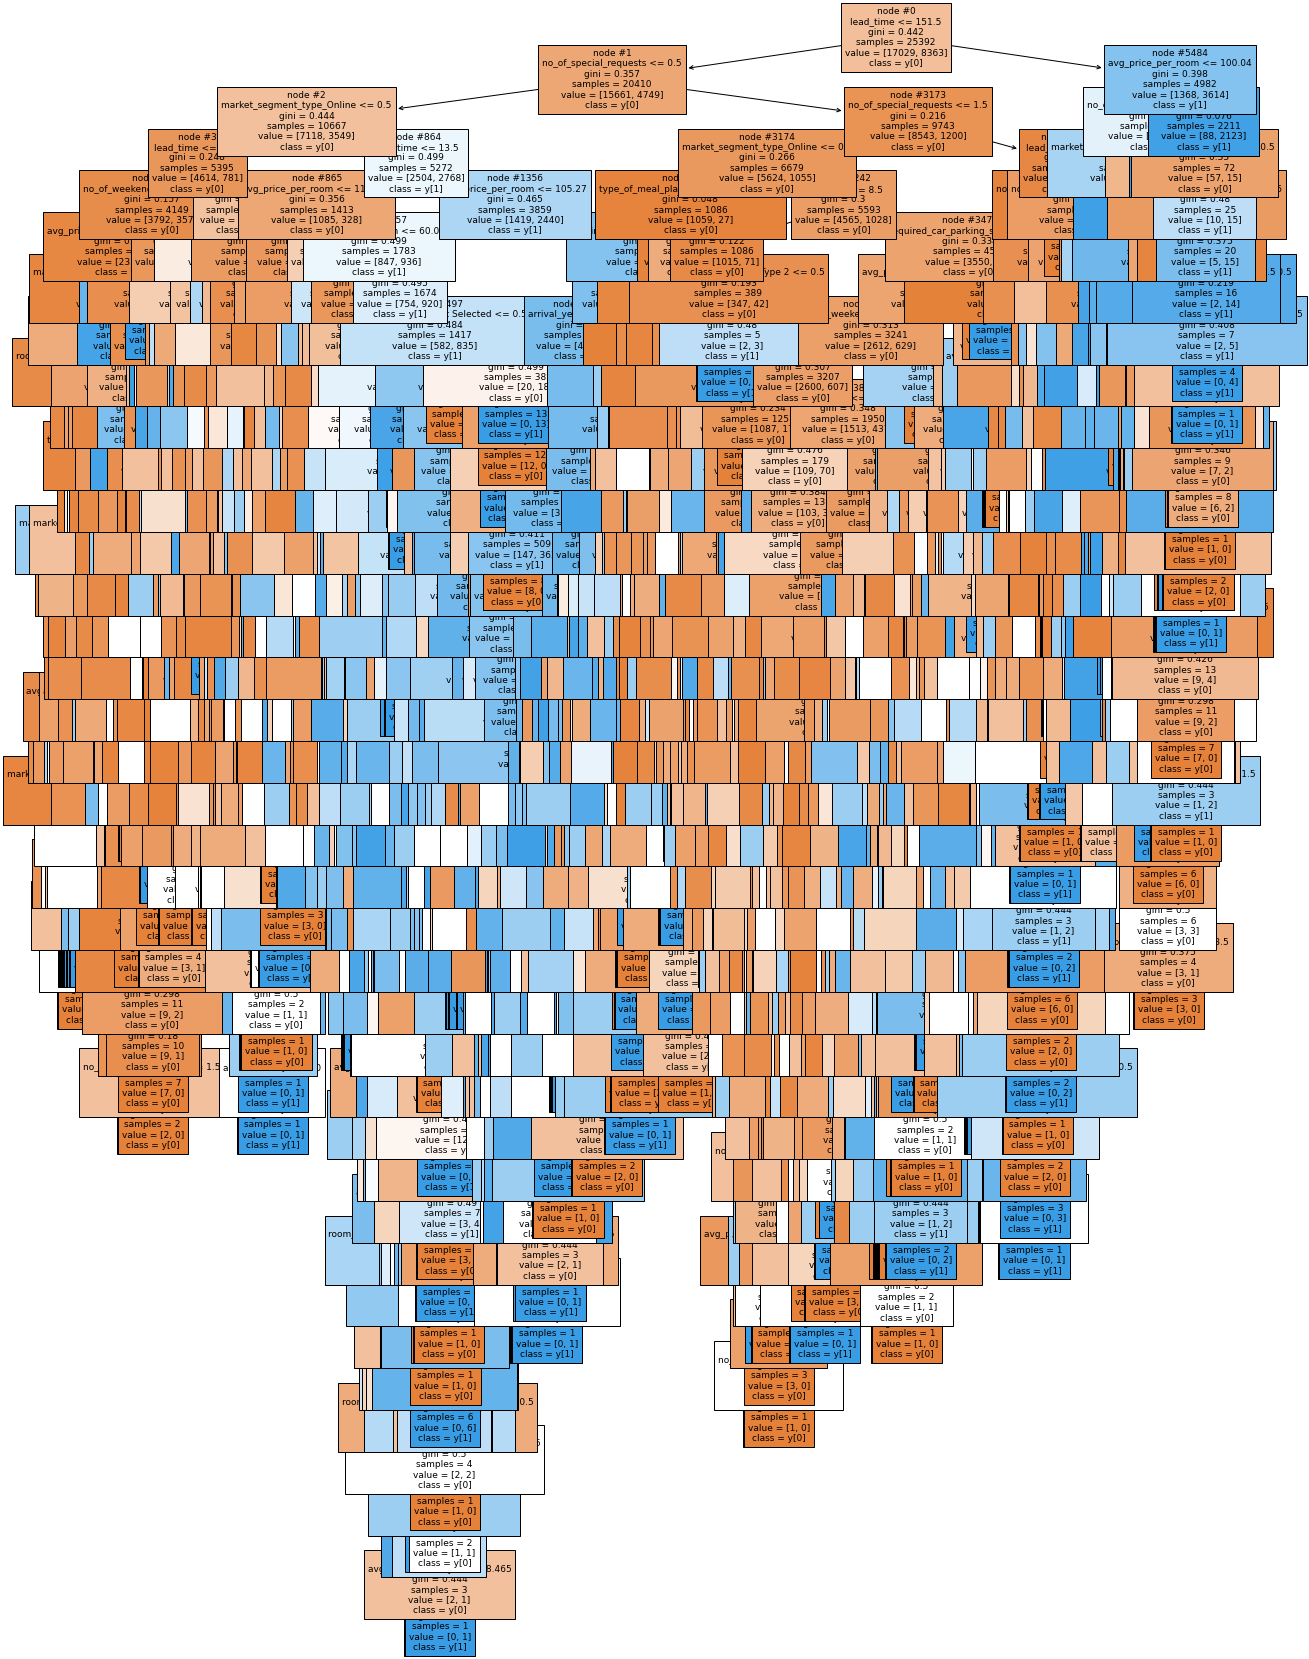

In [154]:
plt.figure(figsize=(20,30))
tree.plot_tree(dec_tree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [155]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dec_tree,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 179.47
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [147.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type

In [156]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dec_tree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                         Imp
lead_time                            0.35233
avg_price_per_room                   0.17020
market_segment_type_Online           0.09386
arrival_date                         0.08478
no_of_special_requests               0.06798
arrival_month                        0.06559
no_of_week_nights                    0.04936
no_of_weekend_nights                 0.03888
no_of_adults                         0.02635
arrival_year                         0.01197
type_of_meal_plan_Not Selected       0.00719
required_car_parking_space           0.00672
room_type_reserved_Room_Type 4       0.00592
type_of_meal_plan_Meal Plan 2        0.00580
no_of_children                       0.00447
room_type_reserved_Room_Type 2       0.00244
market_segment_type_Offline          0.00233
room_type_reserved_Room_Type 5       0.00138
market_segment_type_Corporate        0.00073
repeated_guest                       0.00054
room_type_reserved_Room_Type 7       0.00044
room_type_

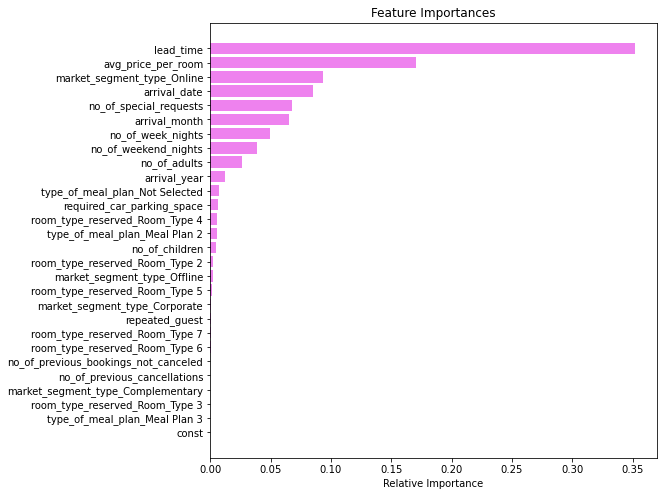

In [157]:
importances = dec_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### observation : 
* Lead time followed by avg_price per room is the most important variable for predicting the booking status as per the tree.
* In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits and it captures more information about the data and this is one of the root causes of overfitting

### Pruning the tree

### Using GridSearch for Hyperparameter tuning of our tree model
* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

#### Pre - Pruning

In [158]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

### Checking model performance confusion matix on Train and Test

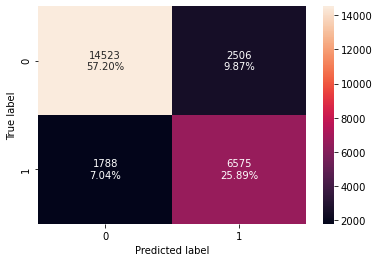

In [159]:
#  confusion matrix on train data
confusion_matrix_sklearn(estimator,X_train, y_train)

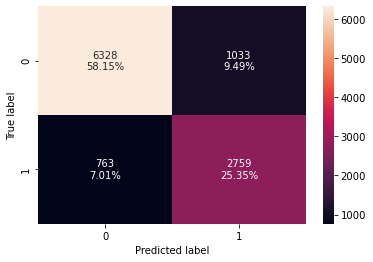

In [160]:
#  confusion matrix on test data
confusion_matrix_sklearn(estimator,X_test,y_test)

### Checking model performance scores on Train and Test

In [161]:
# checking model scores on Train data 
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator,X_train, y_train)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.83089 0.78620    0.72404 0.75384

In [162]:
# checking model scores on test daata
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator,X_test,y_test)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.83497 0.78336    0.72758 0.75444

### Observation : 
* The performance scores are close on both training and testing data.
* The model is showing generalised results.

### Visualizing the Decision Tree

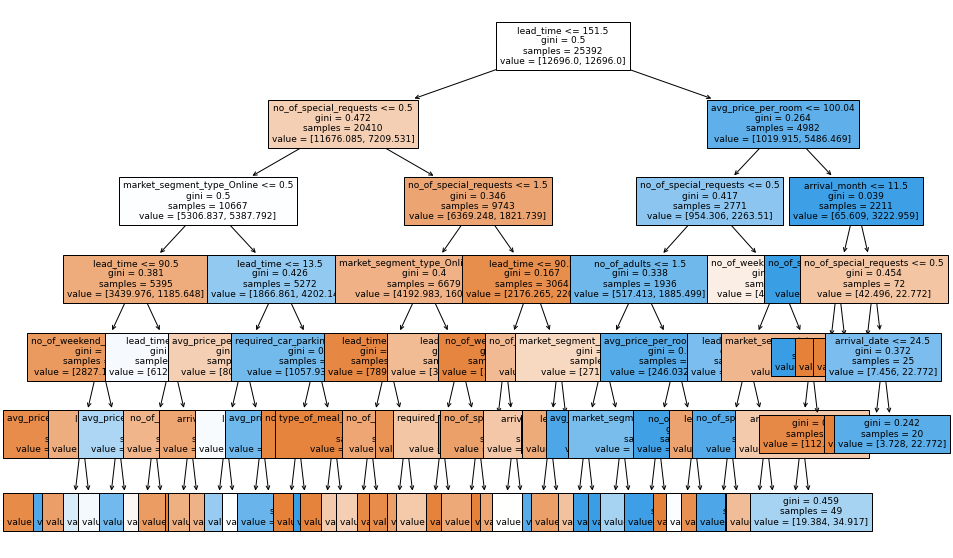

In [163]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [164]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 179.47
|   |   |   |   |   |   |--- weights: [1734.15, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  179.47
|   |   |   |   |   |   |--- weights: [2.98, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

In [165]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                         Imp
lead_time                            0.47547
market_segment_type_Online           0.18476
no_of_special_requests               0.16932
avg_price_per_room                   0.07545
no_of_adults                         0.02694
no_of_weekend_nights                 0.02107
arrival_month                        0.01414
required_car_parking_space           0.01411
market_segment_type_Offline          0.01002
no_of_week_nights                    0.00701
type_of_meal_plan_Not Selected       0.00095
arrival_date                         0.00076
room_type_reserved_Room_Type 3       0.00000
market_segment_type_Corporate        0.00000
market_segment_type_Complementary    0.00000
room_type_reserved_Room_Type 7       0.00000
room_type_reserved_Room_Type 6       0.00000
room_type_reserved_Room_Type 5       0.00000
room_type_reserved_Room_Type 4       0.00000
type_of_meal_plan_Meal Plan 2        0.00000
room_type_reserved_Room_Type 2       0.00000
type_of_me

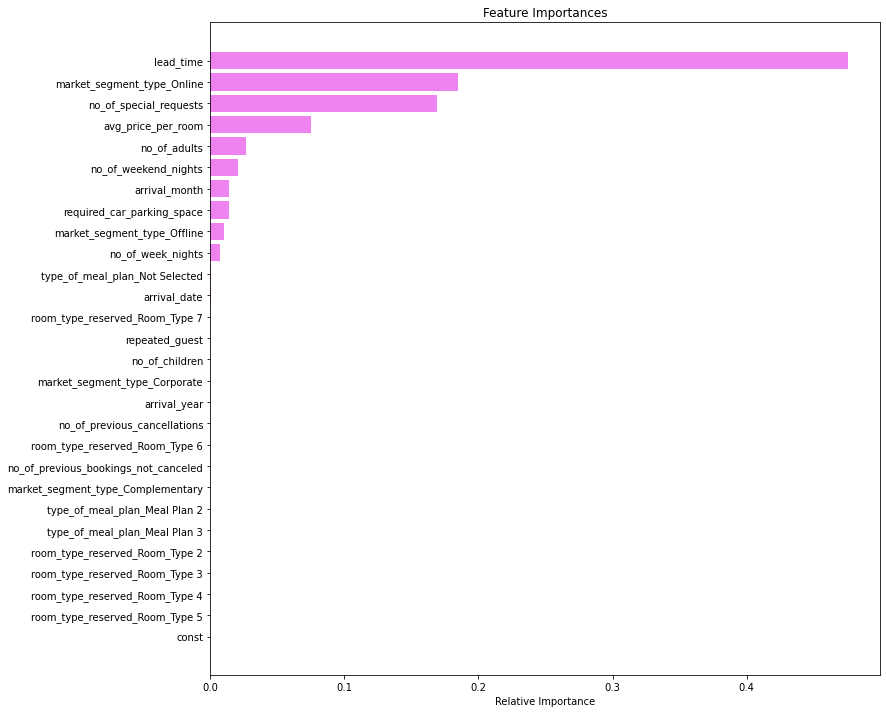

In [166]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observation : 
* The model shows gernalised results. 
* Lead time ,market segement online followed by no of special request play a major role in booking status accrosing to this model.


### Cost Complexity Pruning

The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

### Total impurity of leaves vs effective alphas of pruned tree

Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [167]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [168]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00677
1        0.00000     0.00677
2        0.00000     0.00677
3        0.00000     0.00677
4        0.00000     0.00677
...          ...         ...
1900     0.00546     0.27206
1901     0.00614     0.27820
1902     0.01459     0.29279
1903     0.02519     0.34316
1904     0.04577     0.38893

[1905 rows x 2 columns]

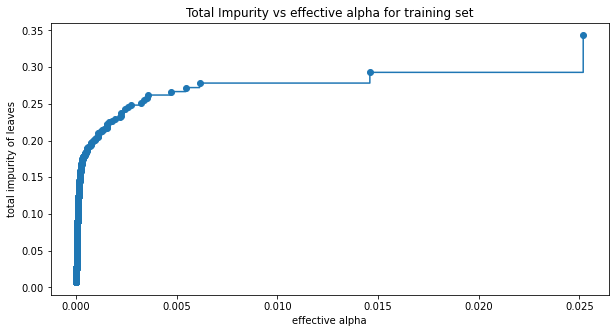

In [169]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [170]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.0457742827391634


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

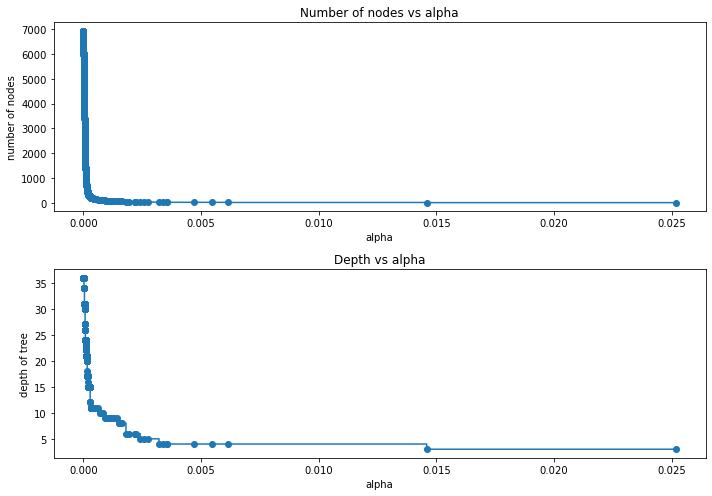

In [171]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 Score vs alpha for training and testing sets

In [172]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

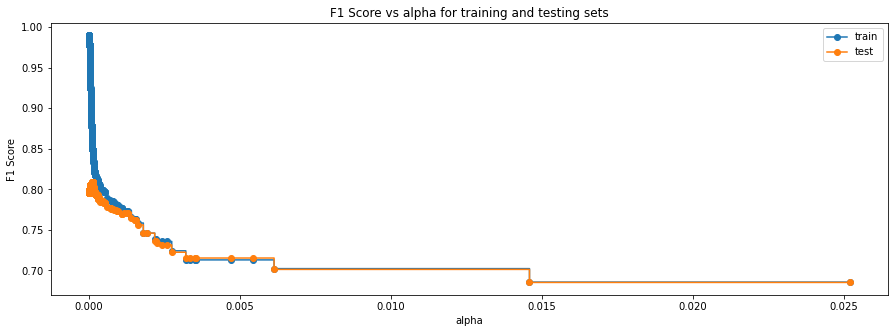

In [173]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [174]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001236246875520156, class_weight='balanced',
                       random_state=1)


###  Model Performance Comparison and Conclusions

### Checking model performance confusion matix on Train and Test

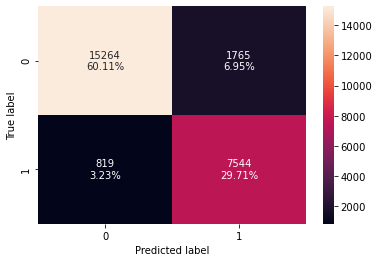

In [175]:
# confusion matrix on Best model train set 

confusion_matrix_sklearn(best_model, X_train, y_train)

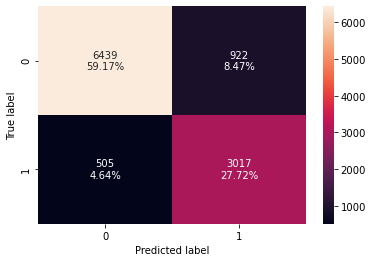

In [176]:
# confusion matrix on Best model test set 

confusion_matrix_sklearn(best_model, X_test, y_test)

### Checking model performance scores on Train and Test

In [177]:
# performance score on the train set 

decision_tree_post_perf_train = model_performance_classification_sklearn(best_model, X_train, y_train)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.89824 0.90207    0.81040 0.85378

In [178]:
# performance score on the test set 

decision_tree_post_perf_test = model_performance_classification_sklearn(best_model, X_test, y_test)
decision_tree_post_perf_test

Accuracy  Recall  Precision      F1
0   0.86888 0.85662    0.76593 0.80874

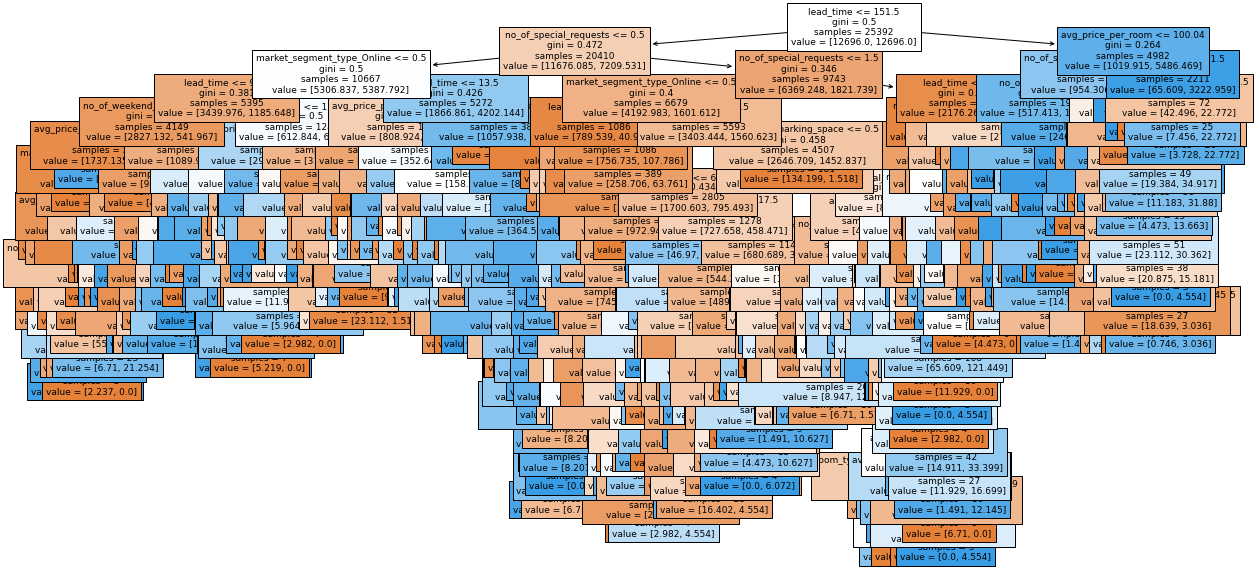

In [179]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [180]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 179.47
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

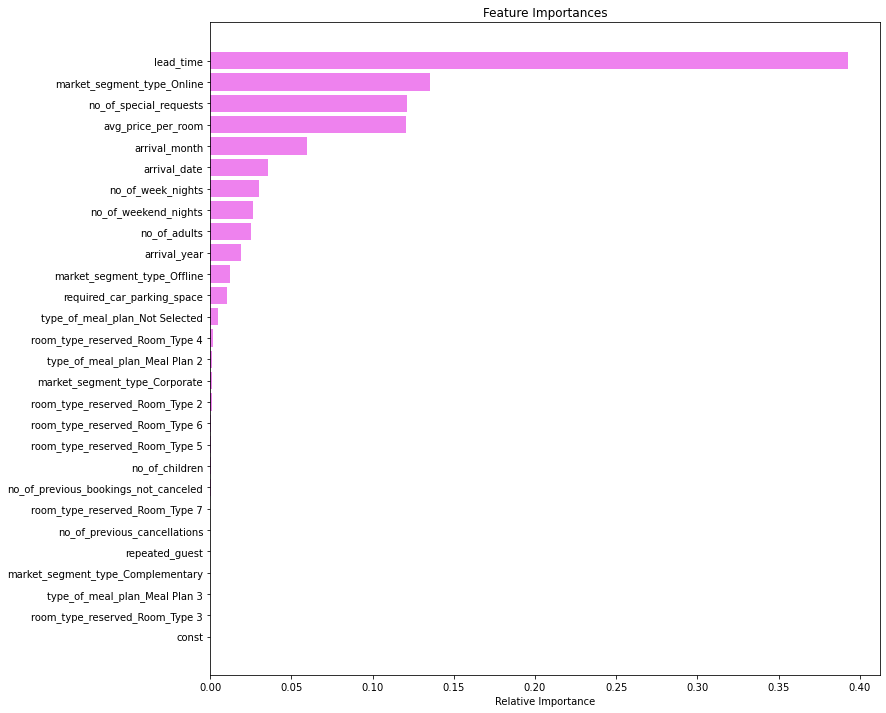

In [181]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observation : 
* Model performs well on train and test data.
* The F1 score on the train set is 0.85 which is good number.
* lead time , market segment online and no of special request followed by the rest remains important in predicting the booking status.
* The greater these values the greater are the chances of booking getting cancelled.
* No of previous booking, no previous cancellations and repeated guests has not much influence in predicting the booking status.

### Comparing Decision Tree models

In [182]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99421                      0.83089   
Recall                   0.98661                      0.78620   
Precision                0.99578                      0.72404   
F1                       0.99117                      0.75384   

           Decision Tree (Post-Pruning)  
Accuracy                        0.89824  
Recall                          0.90207  
Precision                       0.81040  
F1                              0.85378

In [183]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("test performance comparison:")
models_train_comp_df

test performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.87228                      0.83497   
Recall                   0.81175                      0.78336   
Precision                0.79727                      0.72758   
F1                       0.80445                      0.75444   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86888  
Recall                          0.85662  
Precision                       0.76593  
F1                              0.80874

### Comparing Logistic and Decision Tree model scores on Test data

In [184]:
print(" Logistic model Testing performance comparison:")
models_test_comp_df

 Logistic model Testing performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80336   
Recall                                   0.63288   
Precision                                0.72464   
F1                                       0.67566   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79629   
Recall                                0.73651   
Precision                             0.66804   
F1                                    0.70061   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80327  
Recall                                0.70443  
Precision                             0.69282  
F1                                    0.69858

In [185]:
print(" Decision Tree testing performance comparison:")
models_train_comp_df

 Decision Tree testing performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.87228                      0.83497   
Recall                   0.81175                      0.78336   
Precision                0.79727                      0.72758   
F1                       0.80445                      0.75444   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86888  
Recall                          0.85662  
Precision                       0.76593  
F1                              0.80874

### Observation:  

* As shown above tables showing different threshold models with different score. 
* Decision Tree shows better scores compared to the Logistic model.
* for exmaple : when we compare the Fi scores of best models between( Logistic Regression-0.37 Threshold f1 score = 0.70) vs (Decision Tree (Post-Pruning) f1 score = 0.80). The Decision tree shows a better F1 score by 0.10
* Hence, we can conclude Decision Tree model can be used for better prediction in this case.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

### Actionable Insights: 
* As, per the data 68% of the booking were not cancelled and 32% of the bookings were cancelled.
* Lead time is highest contirbutor for the booking cancellations. The higher the lead time the chances of cancelling gets higher.
* Market segment type most preferably online segement is where most of the bookings are done.
* 64% of the business comes from online business.
* Online segements are the ones which have higher cancellations as well by 35%.
* Repeated customers are ones who do not cancel their bookings most of the time. 
* Repeated guests definitely influence booking cancellations as their cancellation rate is 1.3%
* It is also observed that customers do like special requests and there were less cancellations with more specioal requirements.
* October being the busiest month and hotels should be prepared well in advance.
* It is also observed the customers who cancelled previously will surely not cancel again by 96%.
* Also, the customer who did not cancel previously has a high chances of not cancelling the bookings by 99 %.

### Reccomendations: 

* lead Time definitely has high impact on the booking cancellation and the management either has to take a deposit or additional fee before confirming the booking. which would most likely result in customer not cancelling the booking.
* A  time frame with cancellation fee should be provided to the customers with high lead time. Highers the time frame higher the cancellation fees.
* Also, lead time for pricey rooms should have higher deposits or non refundable fees.
* Hotels should also send timely reminders to the customers with high lead time. This would also help customers to be prepared well in advance and would avoid last minute cancellations.
* Online business is where most of the bookings are done. Hotels should invest  more on oublishing ads online.
* More importantly should be easier to be found online and make it easier for the customers to book online with minimum steps.
* As,online business is a biggest contibutor hotels. Hotels should be able to identify repeated customers and one time customers.
* Repeated customer should be given first priority and  must be offered with sepcial offers such as cost effective meal plans or accesories.
* For one time customers who book online or even from any other segments should have cancellation fee.
* Hotels should be ale to provide cost effective special requirements or some kind of updarres of special offers to customers who are potential customers but are about to cancel their bookings.
* October identified as the busiest months is when hotels can make profit. 
* Nov and Dec  also show potential business.
* Jan and feb being less busy months. Hotels must come up with special attractive offers for months which do not have high booking rates to attract customers to go on vacations.
* Hotel must to able record timely feedback and analyze  to enhance the guest experience.
* Hotels should come up with special offers to attract first time customers and treat them royally with special treatments so they would plan on coming back again.
* Customer service should top priority that ensures customers would feel like booking again in the future.
* Ofcourse, most importantly maintanence. who wouldnt like to book a hotel which has better hygeine and cleaniliness.